# Physics-Informed Neural Networks for Enhanced Heat Index Forecasting in the Philippine Context


# Import Python Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
import torch
torch.cuda.is_available()

True

In [8]:
torch.cuda.current_device()
torch.cuda.device(0)

In [9]:
# Check GPU details
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 5070 Ti'

## Data Loading

Climatological data from DOST-PAGASA (http://bagong.pagasa.dost.gov.ph/climate/climate-data)
Notes:
- 999.0 indicate Missing Values
- TMAX (Maximum Temperature, Unit: Deg C)
- TMIN (Minimum Temperature, Unit: Deg C)
- RH (Relative Humidity, Unit: %)
- Wind Speed, Unit: m/s
- Wind direction, Unit: degree relative to North indicating where the wind is blowing from

Stations:
- NAIA Latitude: 14.5047 N Longitude: 121.004751 E Elevation: 21 m
- Port Area Latitude: 14.58841 N Longitude: 120.967866 E Elevation: 15 m
- Science Garden Latitude: 14.645072 N Longitude: 121.044282 E Elevation: 42 m
- Baguio Latitude: 16.403992 N Longitude: 120.60147 E Elevation: 1510.08 m
- Laoag Latitude: 18.183016 N Longitude: 120.534723 E Elevation: 5 m
- Sinait Latitude: 17.89019 N Longitude: 120.459762 E Elevation: 58.129 m
- Dagupan Latitude: 16.086784 N Longitude: 120.352045 E Elevation: 2 m
- Tuguegarao Latitude: 17.647678 N Longitude: 121.758469 E Elevation: 62 m
- Aparri Latitude: 18.360059 N Longitude: 121.630454 E Elevation: 3 m
- Basco Radar Latitude: 20.427284 N Longitude: 121.970536 E Elevation: 167 m
- Baler Radar Latitude: 15.748809 N Longitude: 121.632028 E Elevation: 173 m
- Cabanatuan Latitude: 15.470387 N Longitude: 120.951143 E Elevation: 32 m
- CLSU Latitude: 15.73586 N Longitude: 120.9368 E Elevation: 7.6 m
- Clark Latitude: 15.1717 N Longitude: 120.5616667 E Elevation: 151.564 m
- Iba Latitude: 15.328408 N Longitude: 119.965661 E Elevation: 5.538 m
- Ambulong Latitude: 14.09008056 N Longitude: 121.0552444 E Elevation: 11 m
- Sangley Point Latitude: 14.494953 N Longitude: 120.906838 E Elevation: 3 m
- Tanay Latitude: 14.581167 N Longitude: 121.36927 E Elevation: 650 m
- Infanta Latitude: 14.74663611 N Longitude: 121.6490333 E Elevation: 7 m
- Tayabas Latitude: 14.018428 N Longitude: 121.596575 E Elevation: 158 m
- Calapan Latitude: 13.409775 N Longitude: 121.1896667 E Elevation: 41 m
- San Jose Latitude: 12.359602 N Longitude: 121.04788 E Elevation: 3.314 m
- Puerto Princesa Latitude: 9.740134 N Longitude: 118.758613 E Elevation: 16.76 m
- Daet Latitude: 14.128689 N Longitude: 122.982559 E Elevation: 3.77 m
- Legazpi Latitude: 13.150937 N Longitude: 123.728605 E Elevation: 15.487 m
- Virac Synop Latitude: 13.576558 N Longitude: 124.209834 E Elevation: 31.574 m


In [10]:
# Store individual datasets into a dictionary of dataframes
df_ambulong = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Ambulong Daily Data.csv')
df_aparri = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Aparri Daily Data.csv')
df_baguio = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Baguio Daily Data.csv')
df_baler = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Baler Radar Daily Data.csv')
df_basco = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Basco Radar Daily Data.csv')
df_cabanatuan = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Cabanatuan Daily Data.csv')
df_calapan = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Calapan Daily Data.csv')
df_clark = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Clark Daily Data.csv')
df_clsu = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/CLSU Daily Data.csv')
df_daet = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Daet Daily Data.csv')
df_dagupan = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Dagupan Daily Data.csv')
df_iba = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Iba Daily Data.csv')
df_infanta = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Infanta Daily Data.csv')
df_laoag = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Laoag Daily Data.csv')
df_legazpi = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Legazpi Daily Data.csv')
df_naia = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/NAIA Daily Data.csv')
df_port = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Port Area Daily Data.csv')
df_puerto = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Puerto Princesa Daily Data.csv')
df_sanjose = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/San Jose Daily Data.csv')
df_sangley = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Sangley Point Daily Data.csv')
df_sciencegarden = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Science Garden Daily Data.csv')
df_sinait = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Sinait Daily Data.csv')
df_tanay = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Tanay Daily Data.csv')
df_tayabas = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Tayabas Daily Data.csv')
df_tuguegarao = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Tuguegarao Daily Data.csv')
df_virac = pd.read_csv('C:/Users/Blix/Documents/GitHub/CCTHESS1-CCTHESS2-Dev-and-Docs/datasets/Virac Synop Daily Data.csv')

In [11]:
# Store dataframes in a list for easy access
dataframes = [
    df_ambulong, df_aparri, df_baguio, df_baler, df_basco, df_cabanatuan, df_calapan, df_clark, df_clsu, df_daet, df_dagupan, df_iba, df_infanta, df_laoag, df_legazpi, df_naia,
    df_port, df_puerto, df_sanjose, df_sangley, df_sciencegarden, df_sinait, df_tanay, df_tayabas, df_tuguegarao, df_virac
]
# Corresponding names for the dataframes
dataframe_names = [
    'Ambulong', 'Aparri', 'Baguio', 'Baler', 'Basco', 'Cabanatuan', 'Calapan', 'Clark', 'CLSU', 'Daet', 'Dagupan', 'Iba', 'Infanta', 'Laoag', 'Legazpi', 'NAIA', 
    'Port Area', 'Puerto Princesa', 'San Jose', 'Sangley Point', 'Science Garden', 'Sinait', 'Tanay', 'Tayabas', 'Tuguegarao', 'Virac Synop'
]

## Initial Sanity Check

In [12]:
def sanity_check(df):
    # Print name of dataset (e.g. df_ambulong)
    print(f"Sanity Check for dataset: {df.name}")
    print("First 5 rows of the dataframe:")
    print(df.head())
    print("\nDataframe Info:")
    print(df.info())
    print("\nMissing Values in each column (containing -999.0):")
    print((df == -999.0).sum())
    print("\nDuplicate values in the dataframe:")
    print(df.duplicated().sum())
    print("\nStatistical Summary:")
    print(df.describe())

In [13]:
for df, name in zip(dataframes, dataframe_names):
    df.name = name  # Assign name attribute to dataframe
    sanity_check(df)
    print("\n" + "="*50 + "\n")

Sanity Check for dataset: Ambulong
First 5 rows of the dataframe:
   YEAR  MONTH  DAY  TMAX  TMIN  RH  WIND_SPEED  WIND_DIRECTION
0  2014      1    1  30.4  22.8  74           2              40
1  2014      1    2  29.9  20.0  74           2              40
2  2014      1    3  31.0  20.5  79           1              40
3  2014      1    4  32.0  22.5  76           1              40
4  2014      1    5  30.6  23.0  75           2              40

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            3652 non-null   int64  
 1   MONTH           3652 non-null   int64  
 2   DAY             3652 non-null   int64  
 3   TMAX            3652 non-null   float64
 4   TMIN            3652 non-null   float64
 5   RH              3652 non-null   int64  
 6   WIND_SPEED      3652 non-null   int64  
 7   WIND_DIRECTION  3

Important Null Value Findings:
- Abulong: 17
- Aparri: 1414
- Baler: 1 
- Basco: 244
- Cabanatuan: 1 
- Calapan: 1 
- Clark: 0
- CLSU: 0
- Daet: 0
- Dagupan: 244
- Iba: 0
- Infanta: 0
- Laoag: 1 
- Legazpi: 0
- NAIA: 79
- Port Area: 26
- Puerto Princesa: 0
- San Jose: 0
- Sangley Point: 1 
- Science Garden: 4
- Sinait: 0 
- Tanay: 1 
- Tayabas: 0
- Tuguegarao: 116
- Virac Synop: 0

In [14]:
# Store columns for each dataframe with -999.0 values
missing_value_columns = {}
for df, name in zip(dataframes, dataframe_names):
    missing_cols = df.columns[(df == -999.0).any()].tolist()
    missing_value_columns[name] = missing_cols
print("Columns with -999.0 values in each dataset:")
for name, cols in missing_value_columns.items():
    print(f"{name}: {cols}")

Columns with -999.0 values in each dataset:
Ambulong: ['TMAX', 'TMIN', 'RH', 'WIND_SPEED', 'WIND_DIRECTION']
Aparri: ['TMAX', 'TMIN', 'RH']
Baguio: []
Baler: ['RH', 'WIND_SPEED', 'WIND_DIRECTION']
Basco: ['RH', 'WIND_SPEED', 'WIND_DIRECTION']
Cabanatuan: ['WIND_SPEED', 'WIND_DIRECTION']
Calapan: ['RH']
Clark: []
CLSU: []
Daet: []
Dagupan: ['TMAX', 'TMIN', 'RH', 'WIND_SPEED', 'WIND_DIRECTION']
Iba: []
Infanta: []
Laoag: ['WIND_SPEED', 'WIND_DIRECTION']
Legazpi: []
NAIA: ['TMAX', 'TMIN', 'RH', 'WIND_SPEED', 'WIND_DIRECTION']
Port Area: ['TMAX', 'TMIN', 'RH', 'WIND_SPEED', 'WIND_DIRECTION']
Puerto Princesa: []
San Jose: []
Sangley Point: ['TMAX', 'TMIN', 'RH', 'WIND_SPEED', 'WIND_DIRECTION']
Science Garden: ['TMAX', 'TMIN', 'RH', 'WIND_SPEED', 'WIND_DIRECTION']
Sinait: []
Tanay: ['TMAX', 'TMIN', 'RH', 'WIND_SPEED', 'WIND_DIRECTION']
Tayabas: []
Tuguegarao: ['TMAX', 'TMIN', 'RH', 'WIND_SPEED', 'WIND_DIRECTION']
Virac Synop: []


In [15]:
# Convert -999.0 to NaN for easier handling
for df in dataframes:
    df.replace(-999.0, np.nan, inplace=True)

In [16]:
# Create Date column for time series plots
for df in dataframes:
    df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

# Exploratory Data Analysis

In [17]:
# Plot time-series graph of features for each dataset that has -999.0 values. Print graph, one feature and one Date at a time. Do not include features that do not have -999.0 values, do not display all Dates at once, and if there is a -999.0 value, consider it as a missing value and display it in the graph.
def plot_time_series_with_missing_values(df, columns):
    for col in columns:
        plt.figure(figsize=(12, 6))
        plt.plot(df['Date'], df[col], marker='o', linestyle='-', markersize=3)
        plt.title(f'Time Series of {col} in {df.name}')
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.show()

C:\Users\Blix\AppData\Local\Temp\ipykernel_20956\2376163538.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


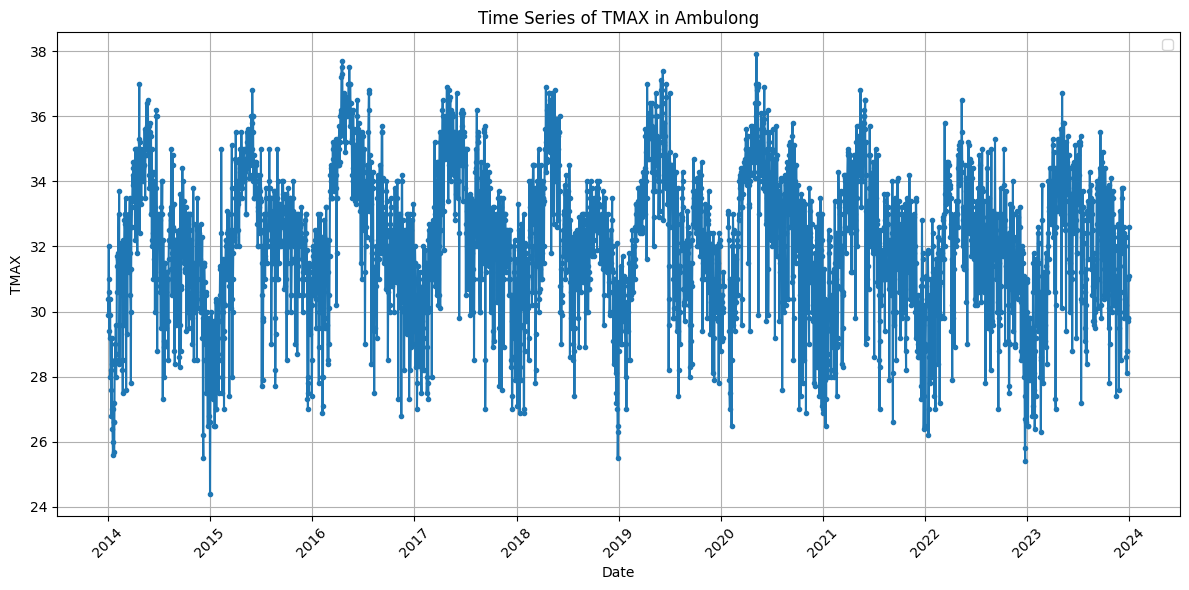

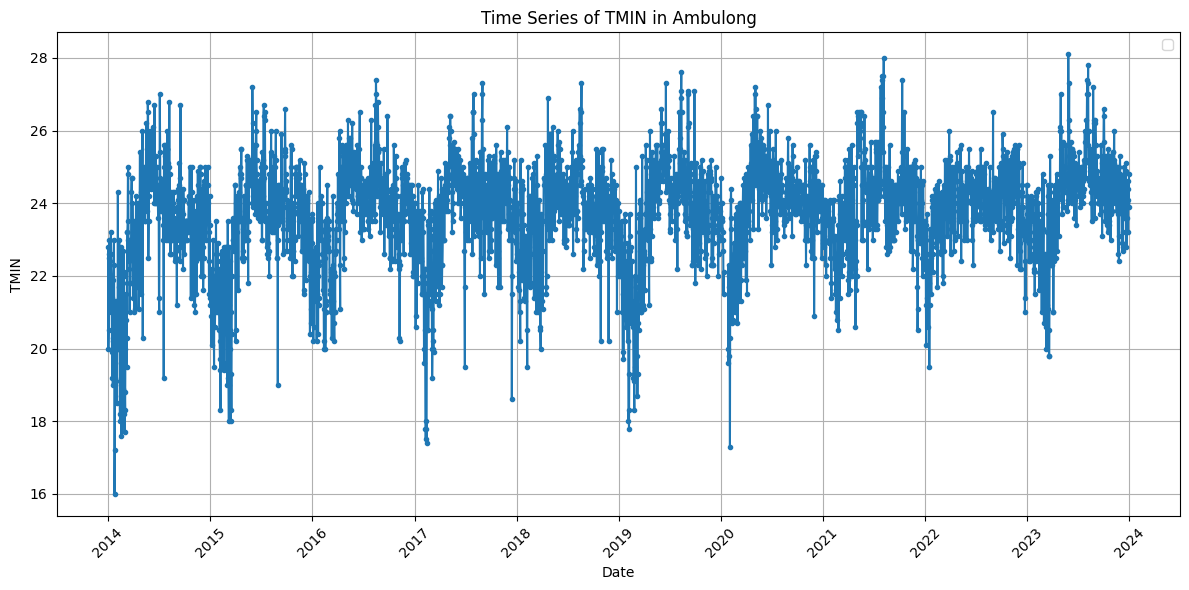

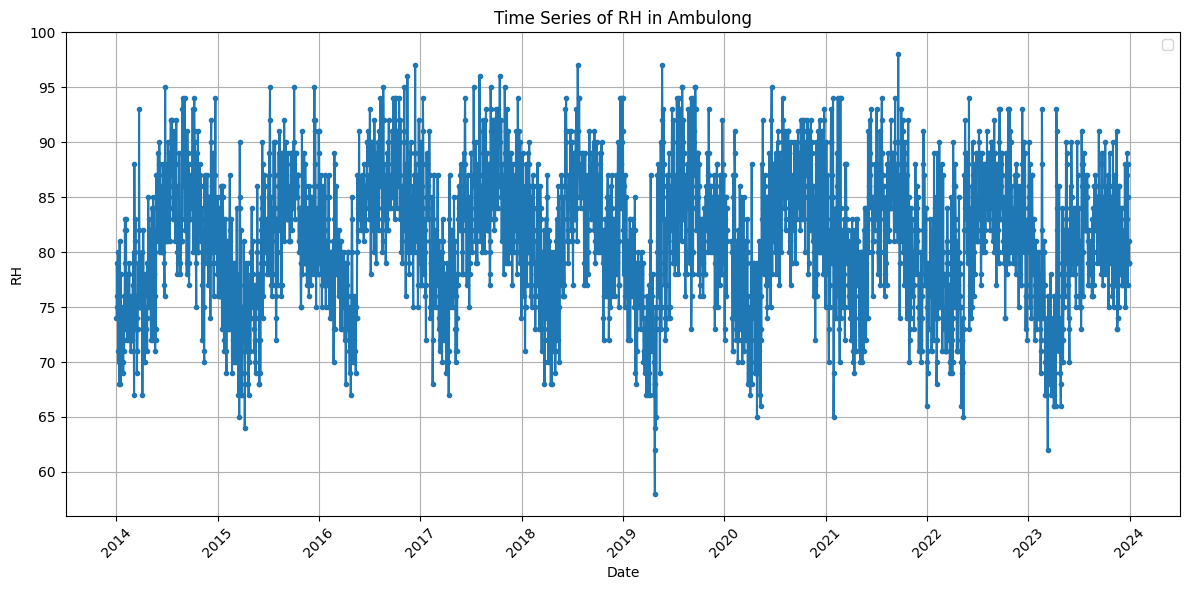

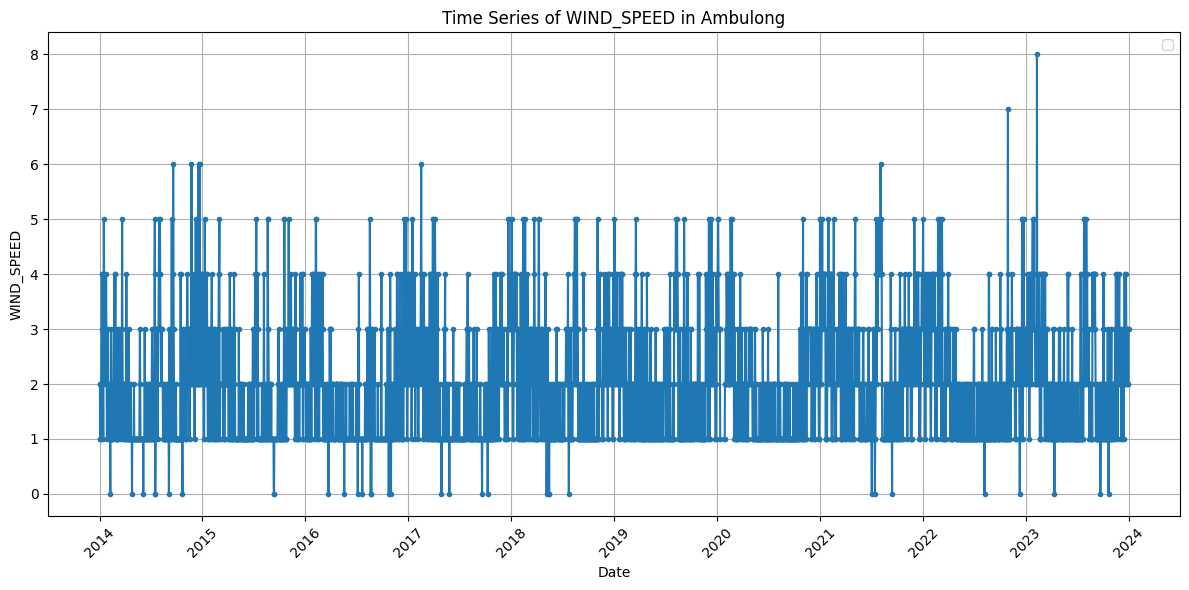

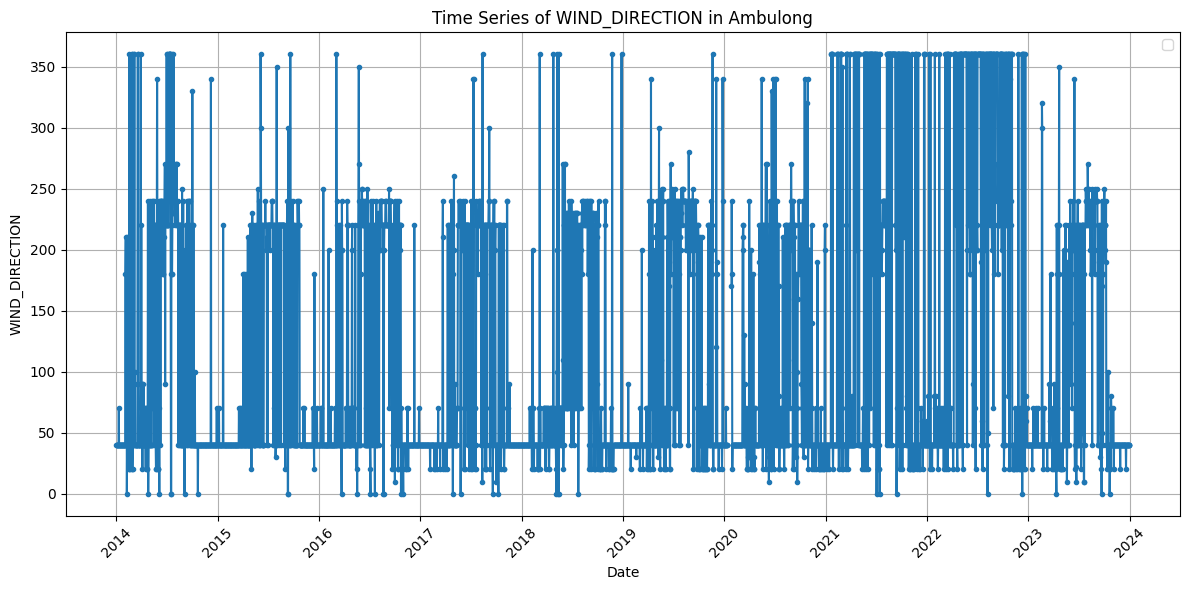

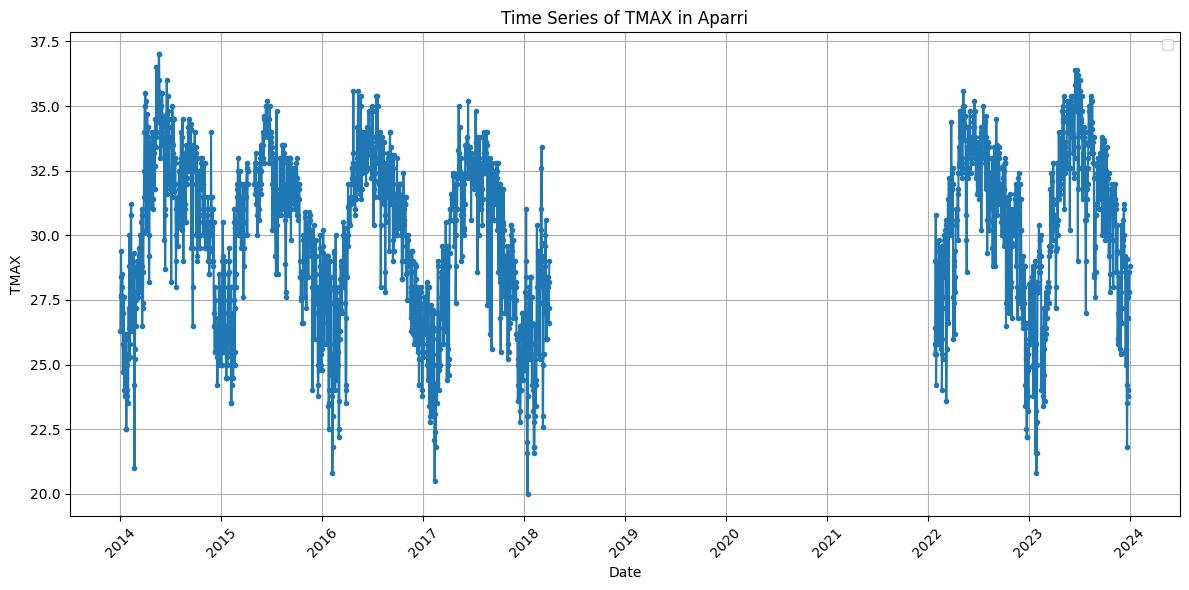

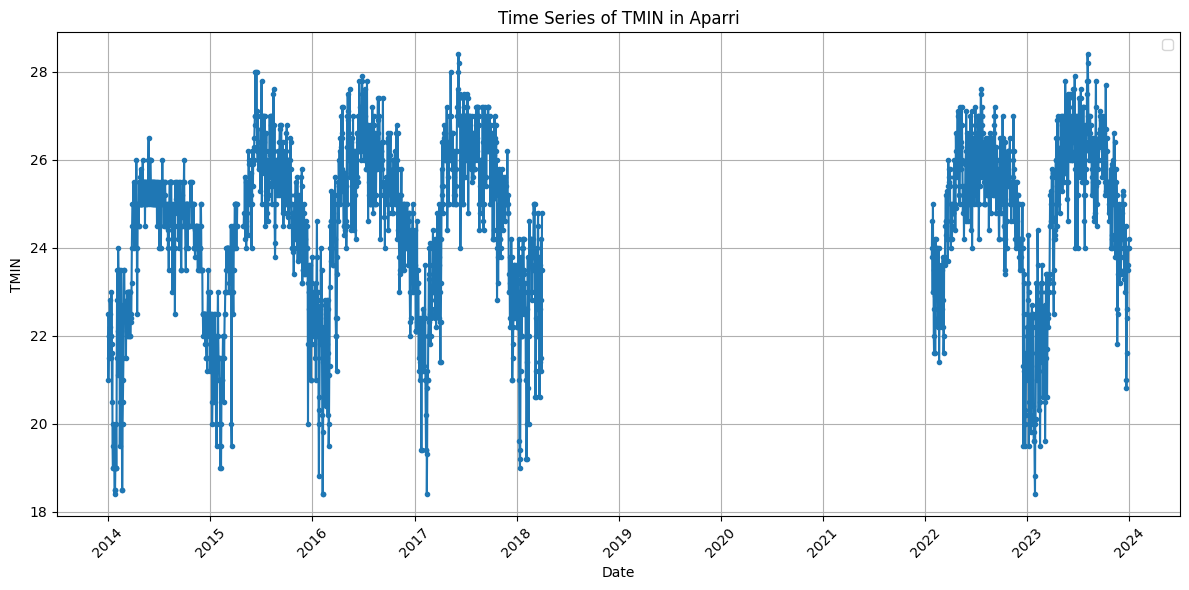

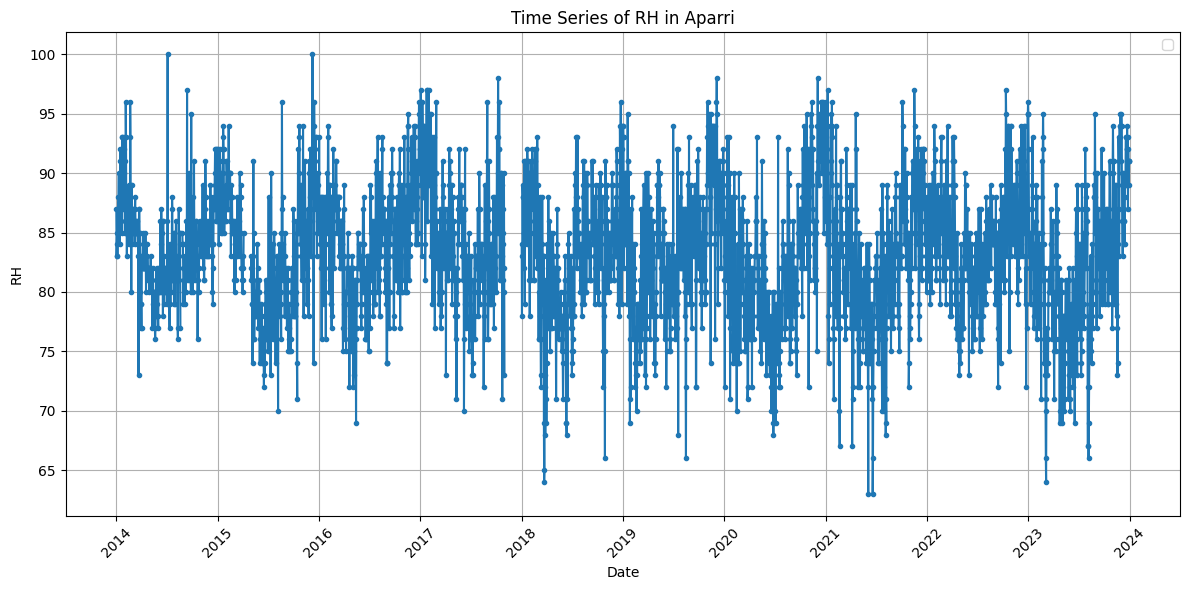

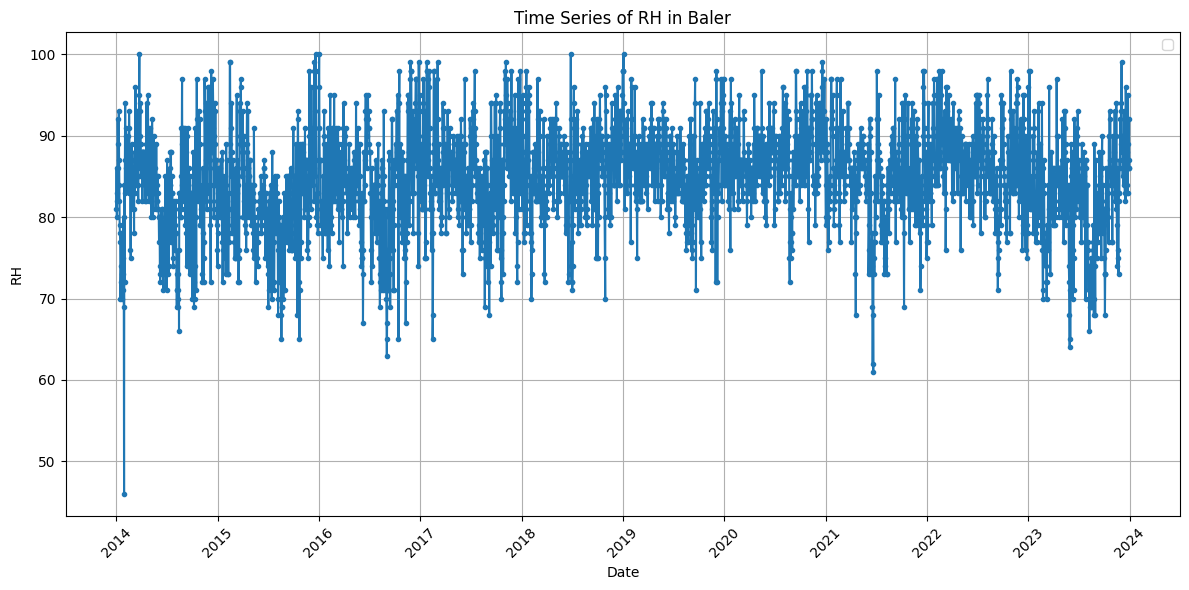

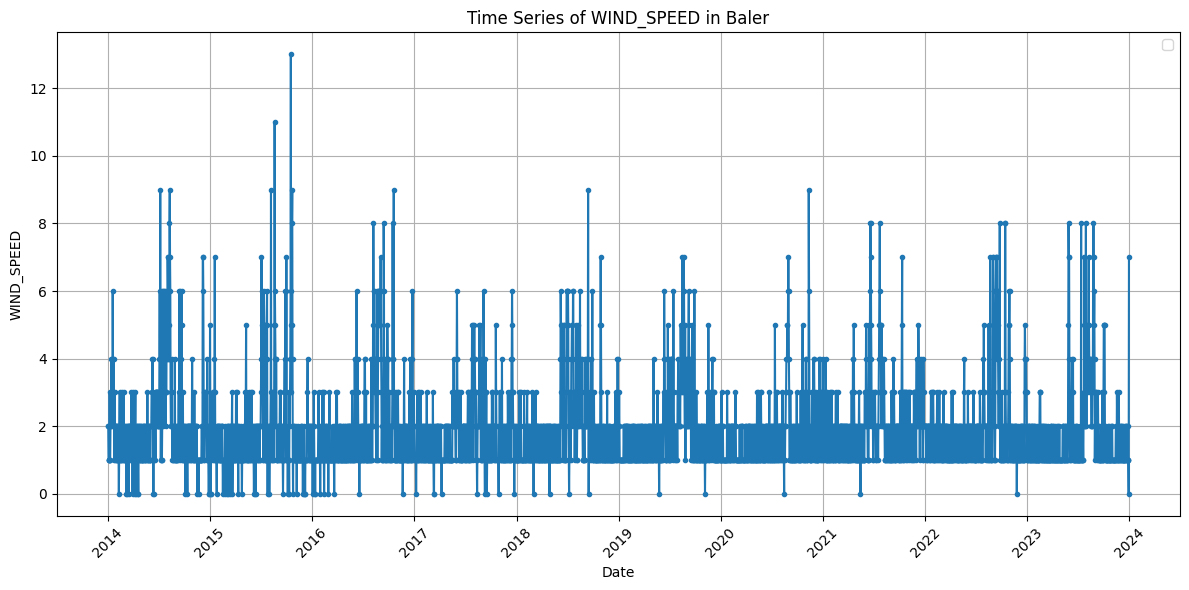

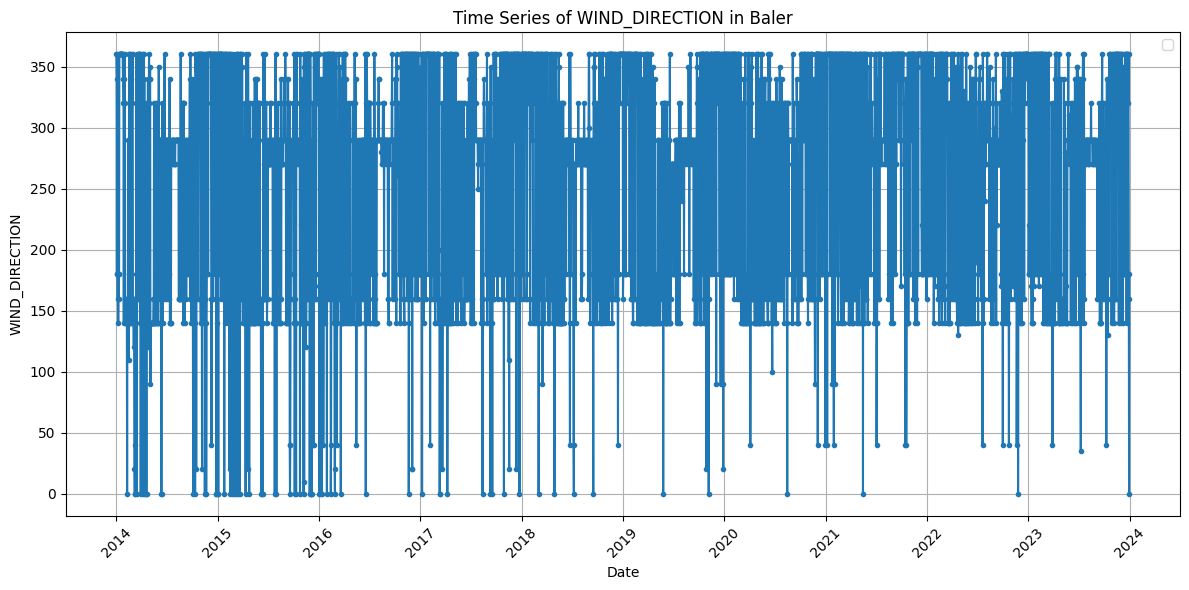

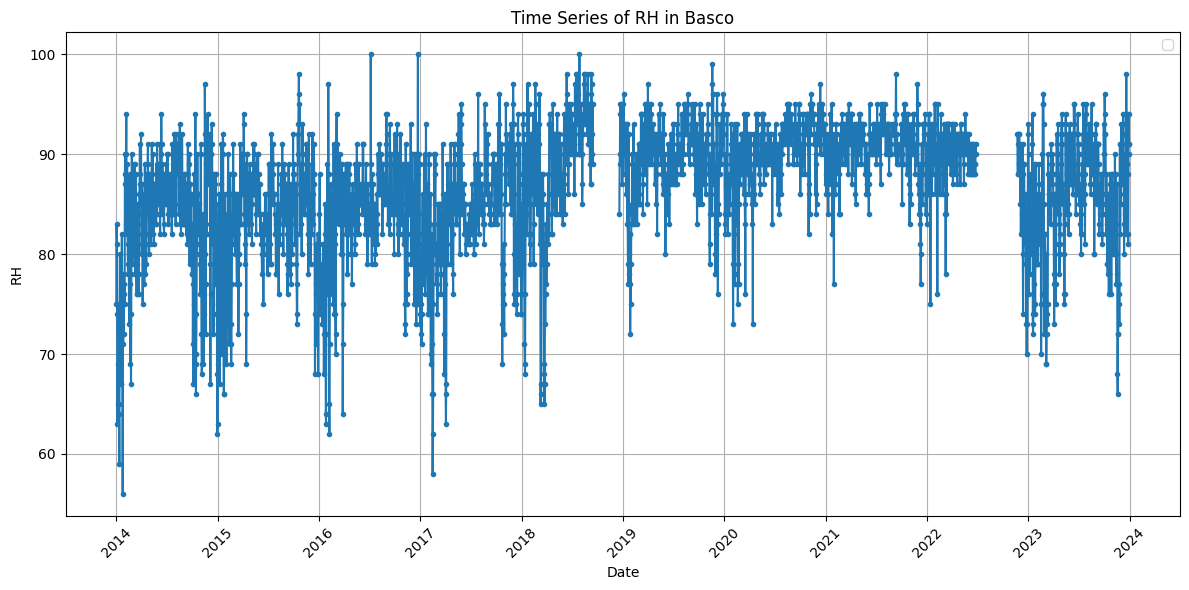

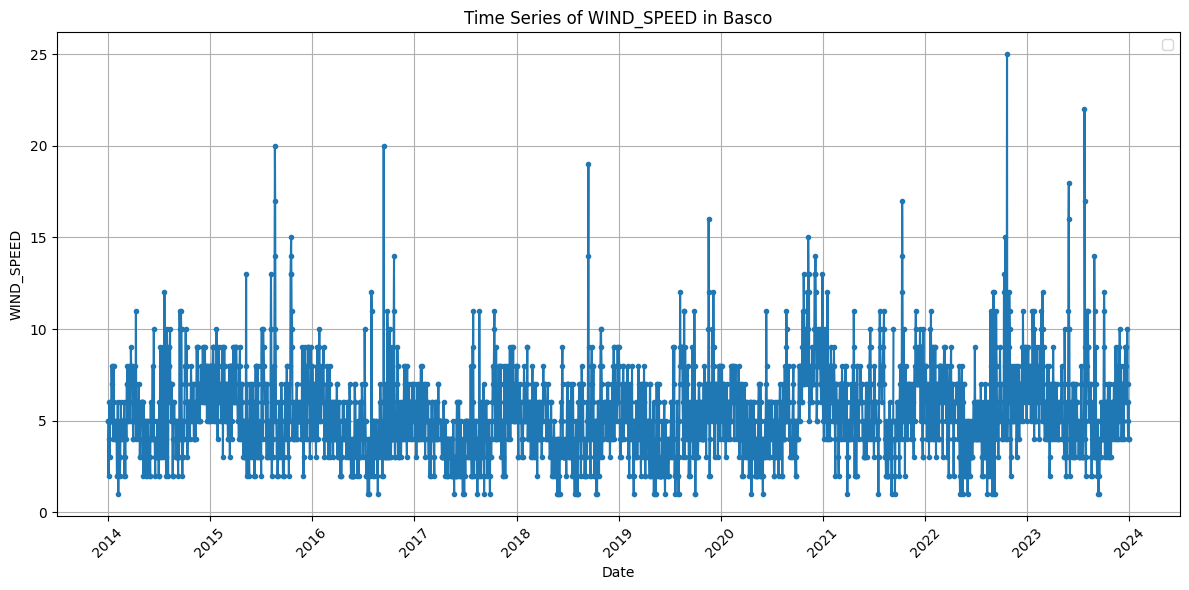

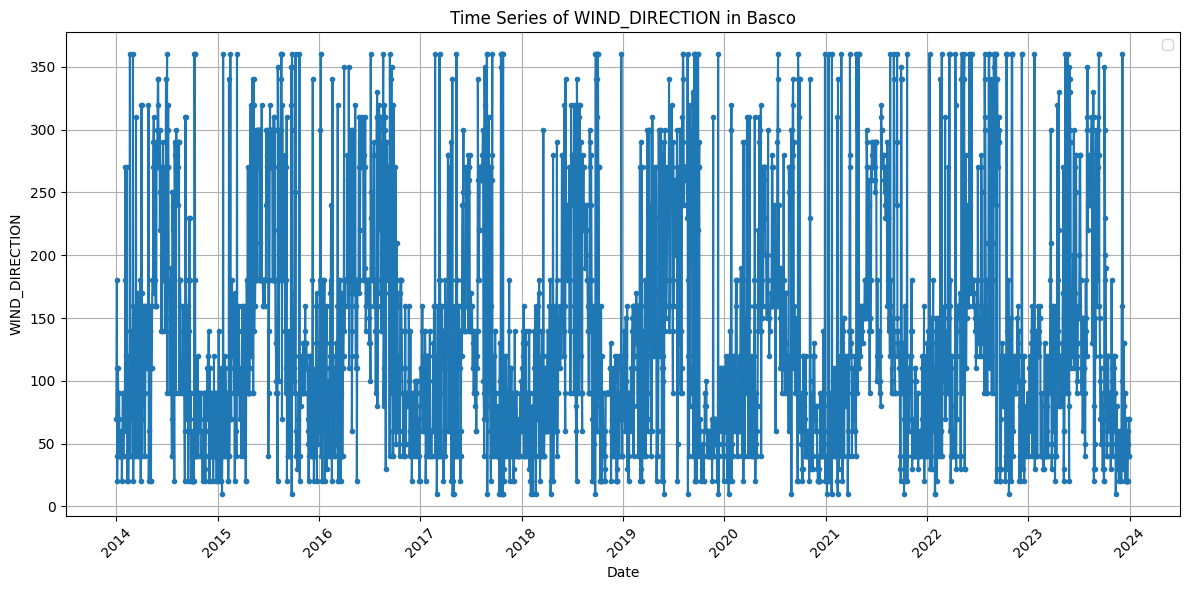

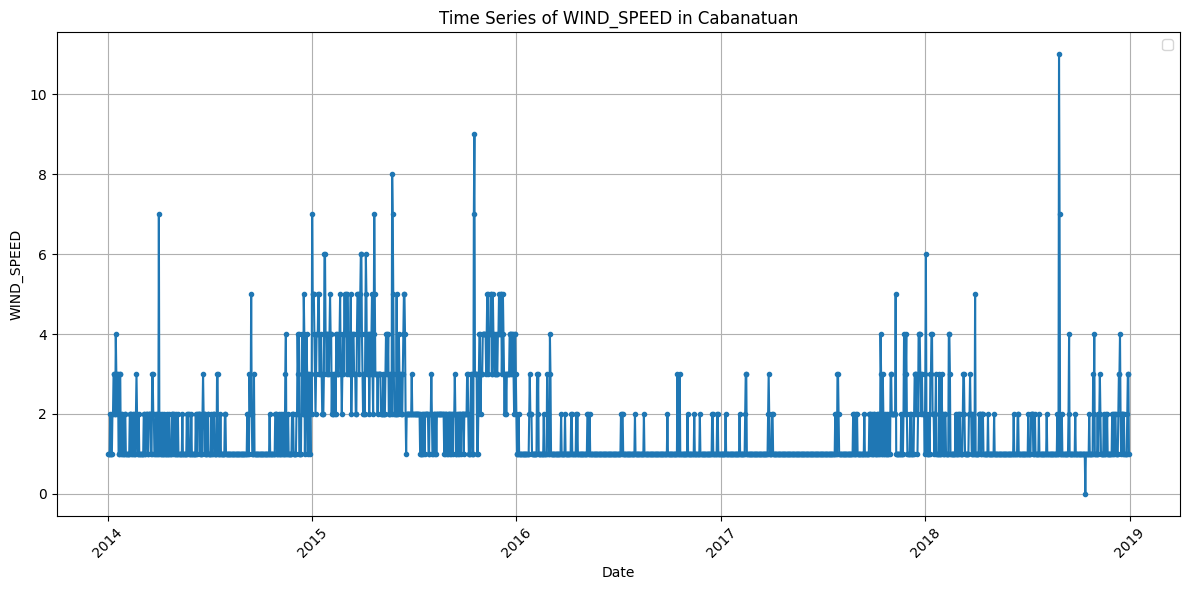

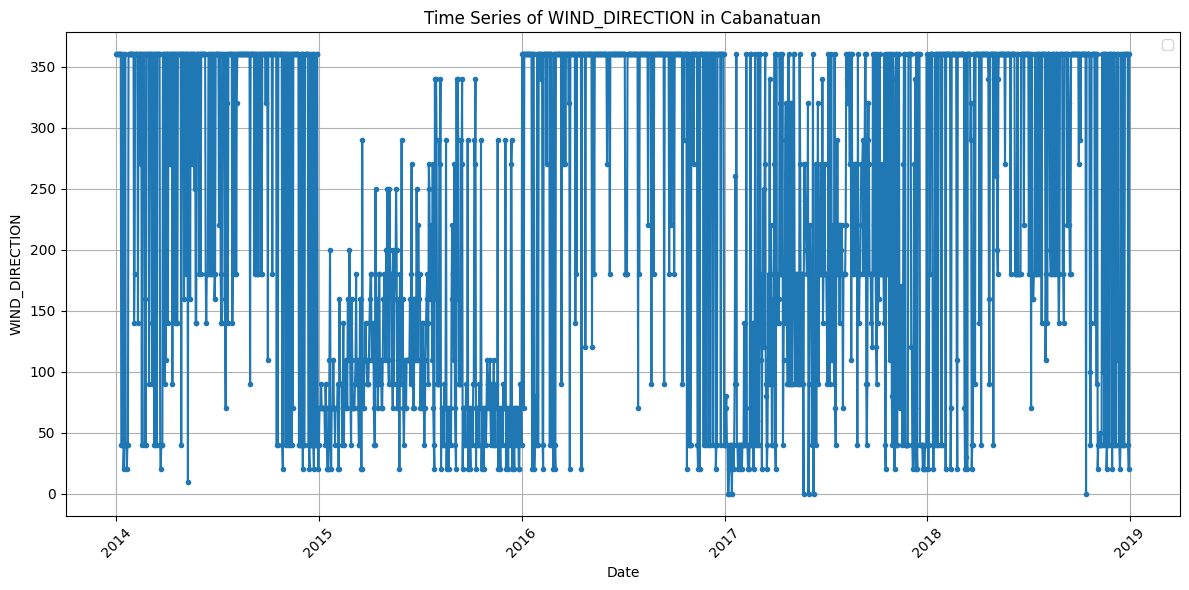

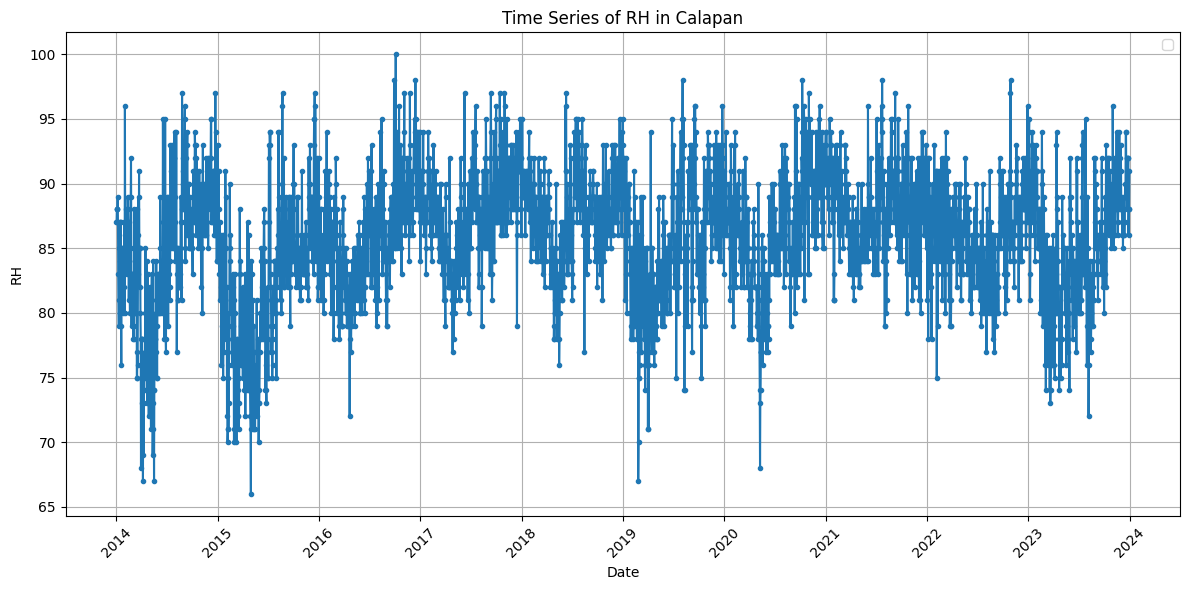

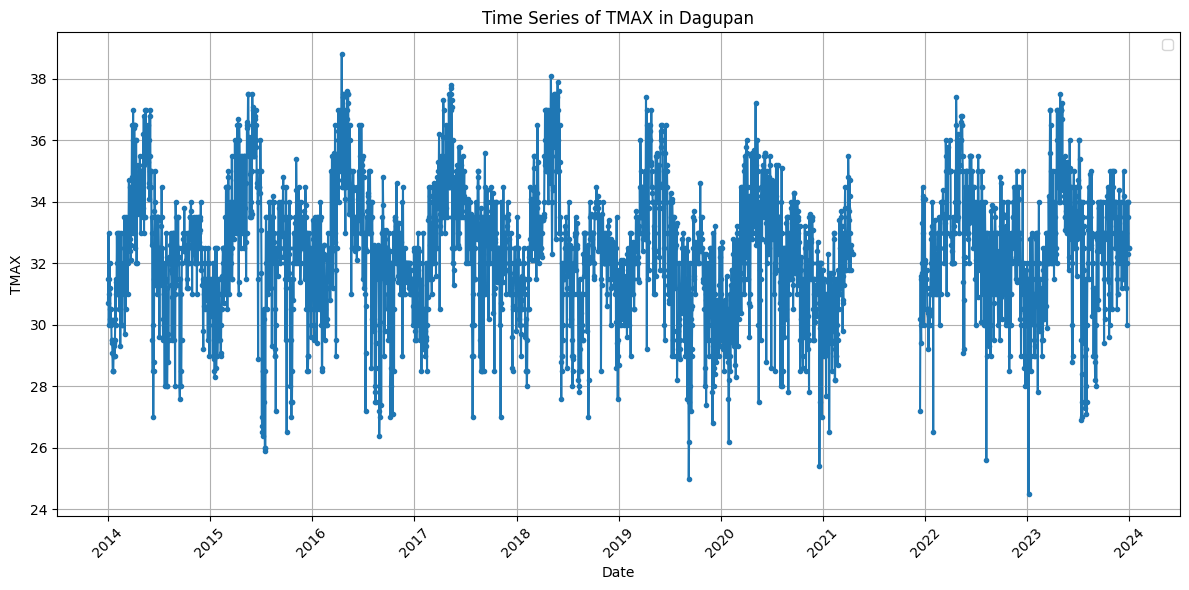

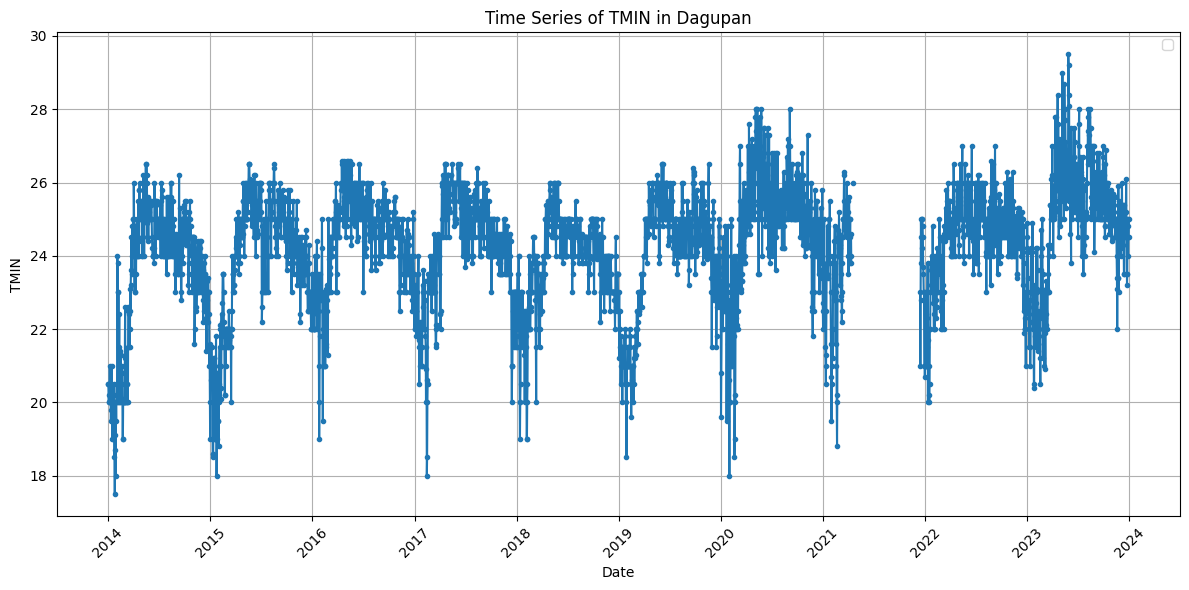

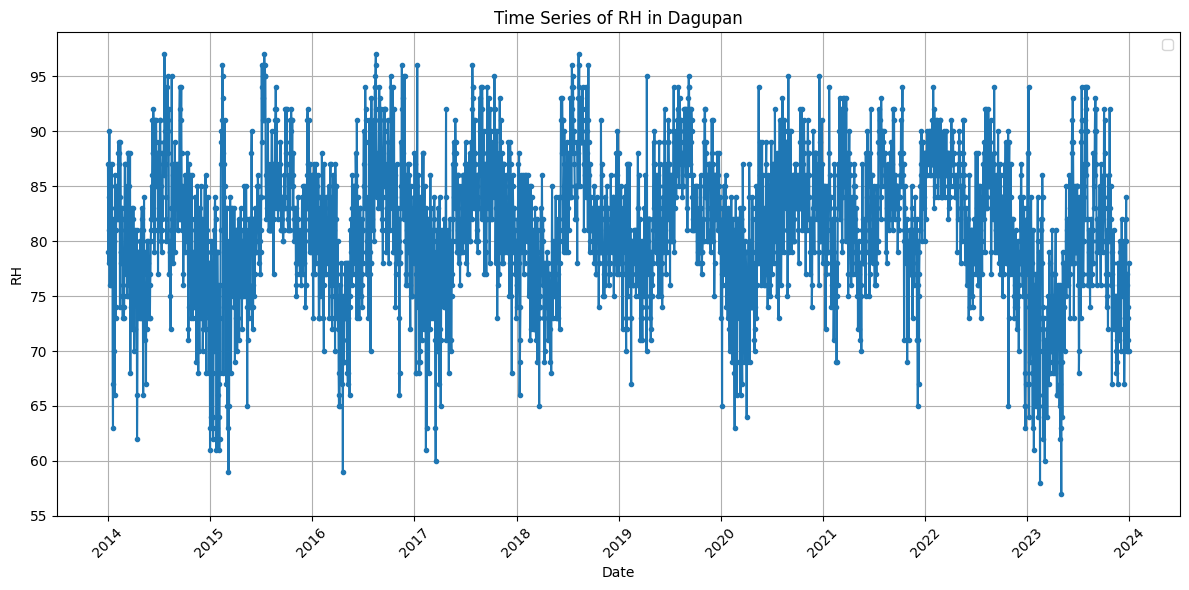

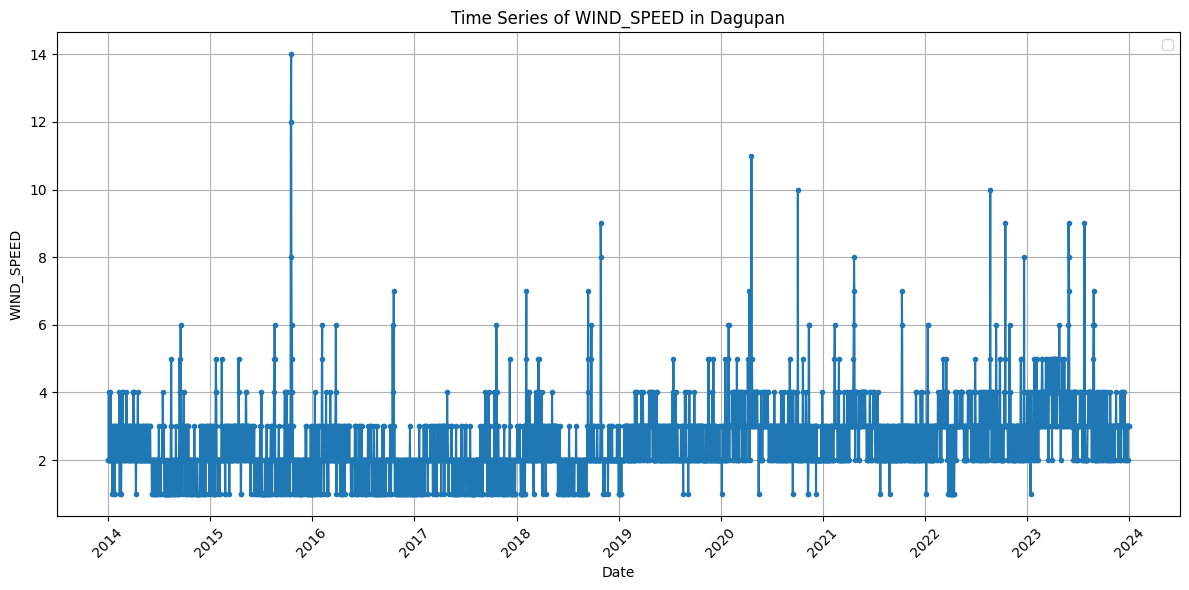

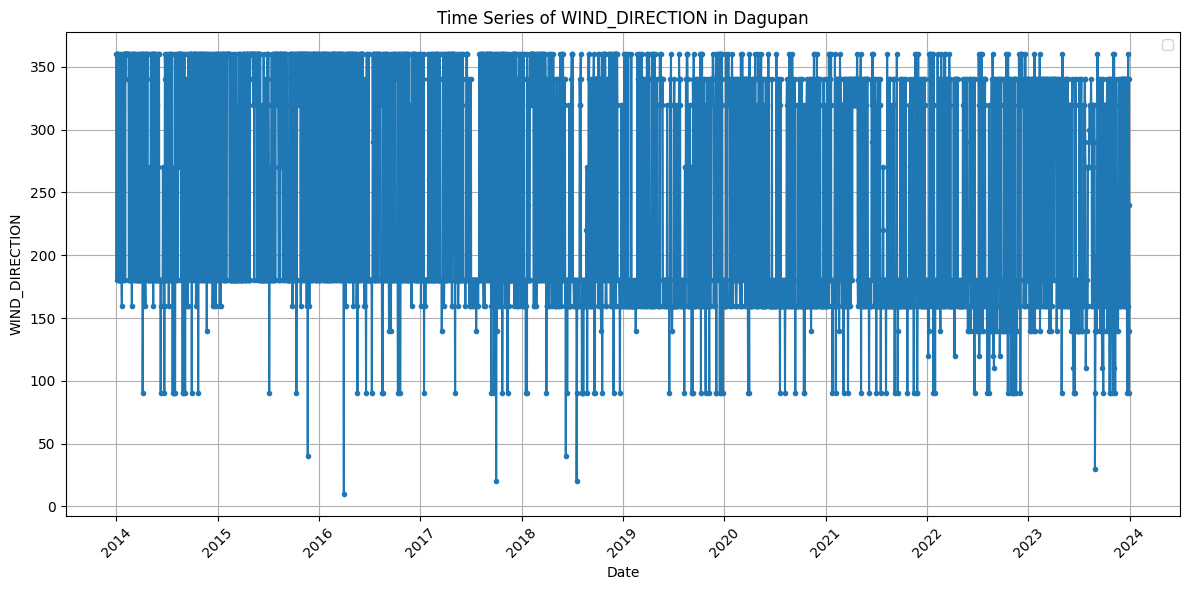

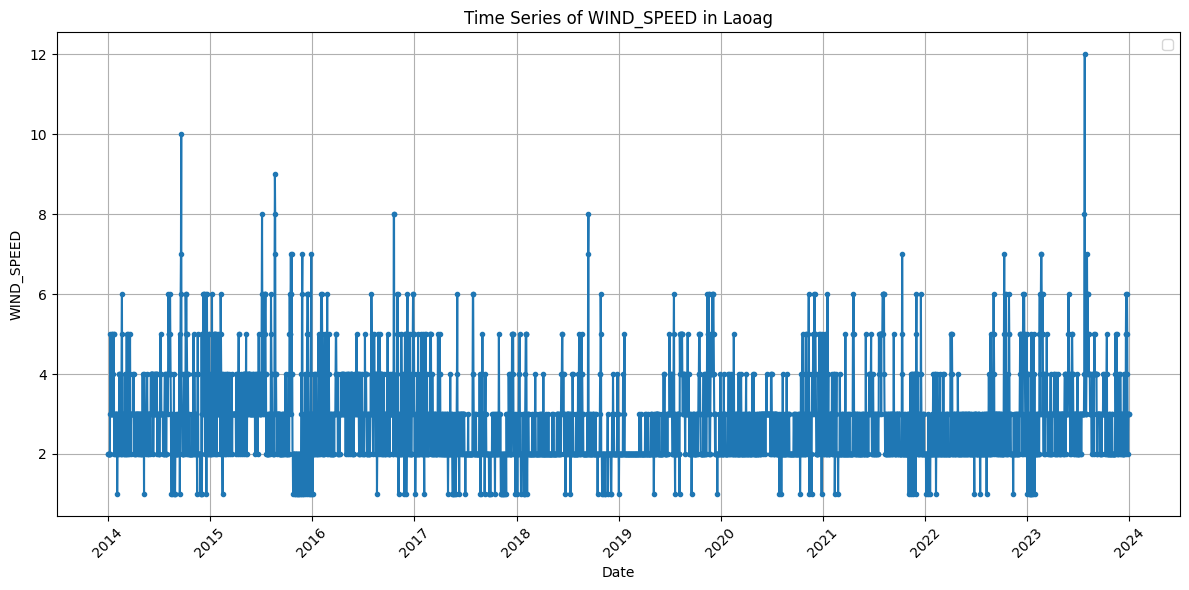

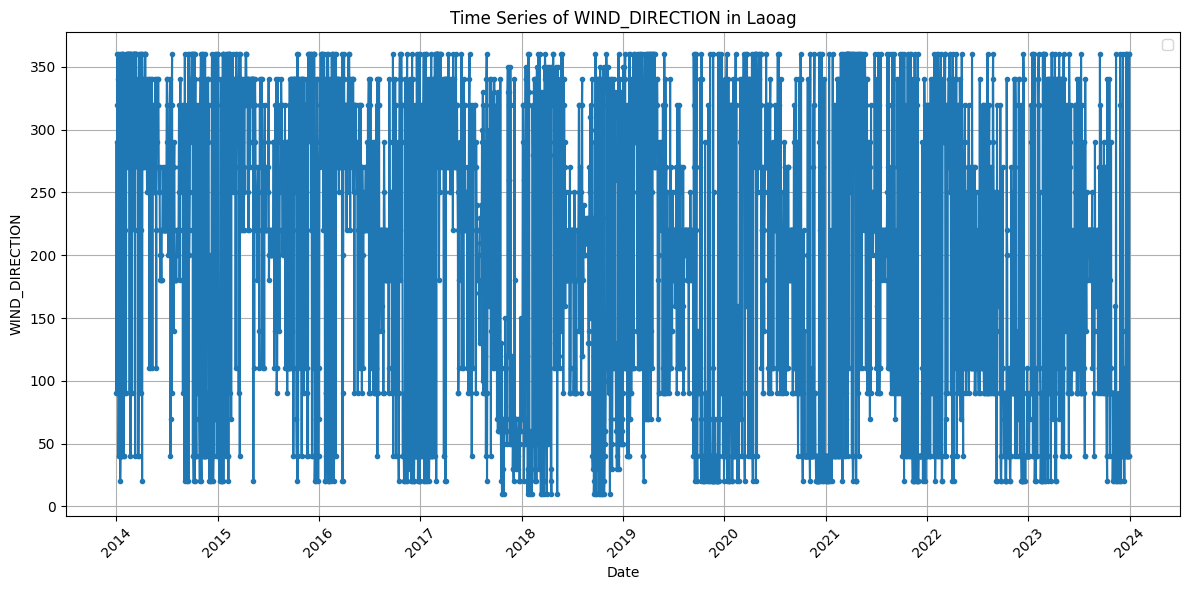

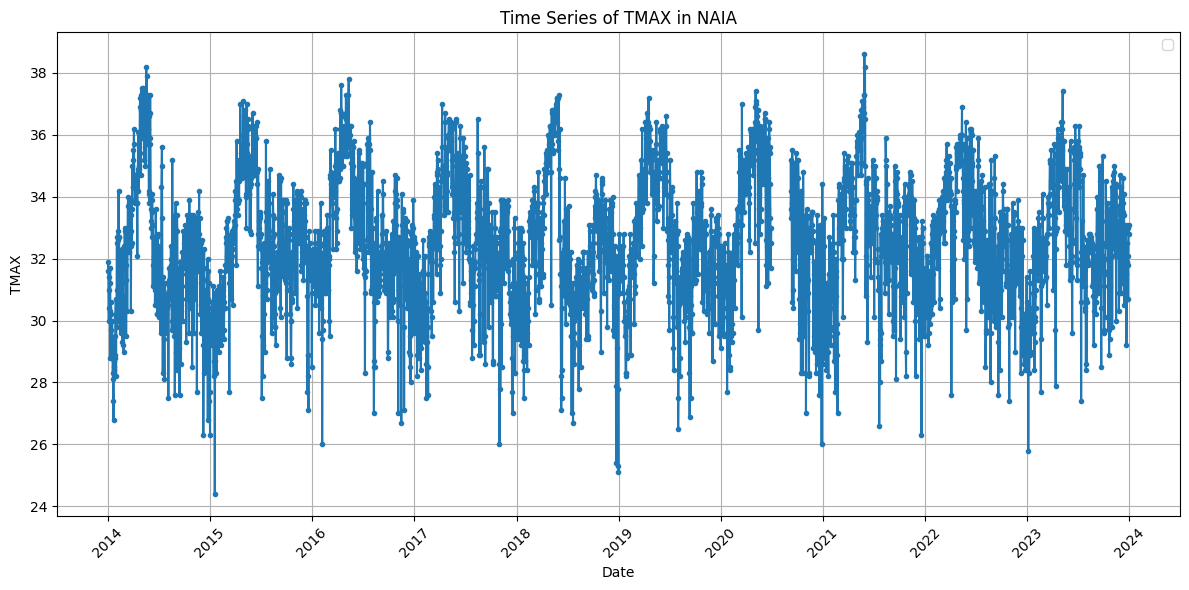

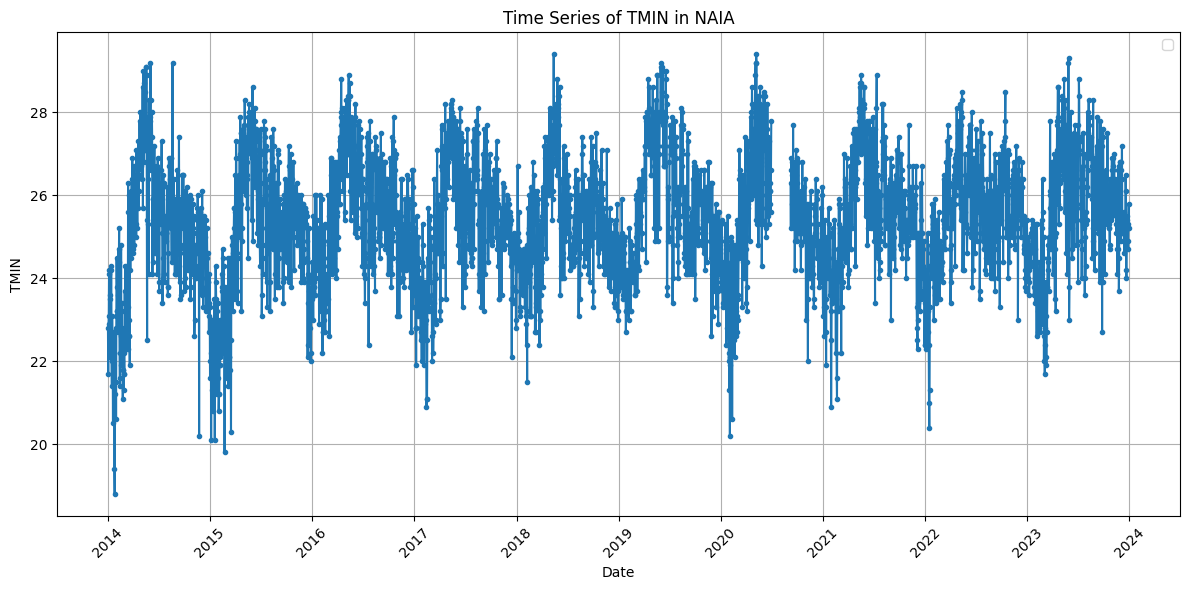

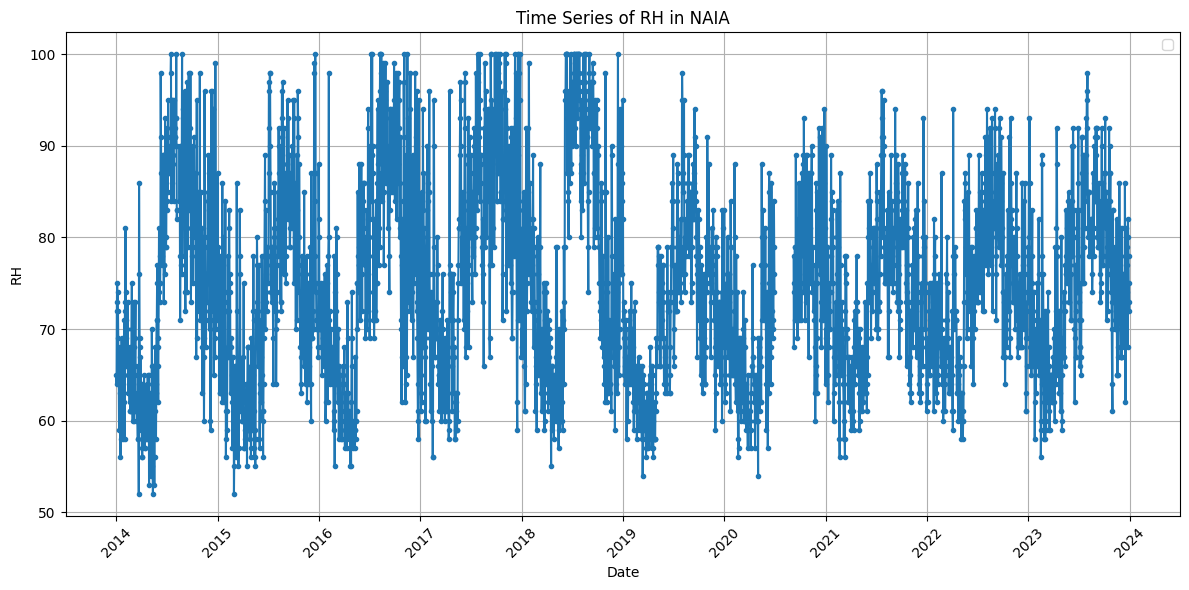

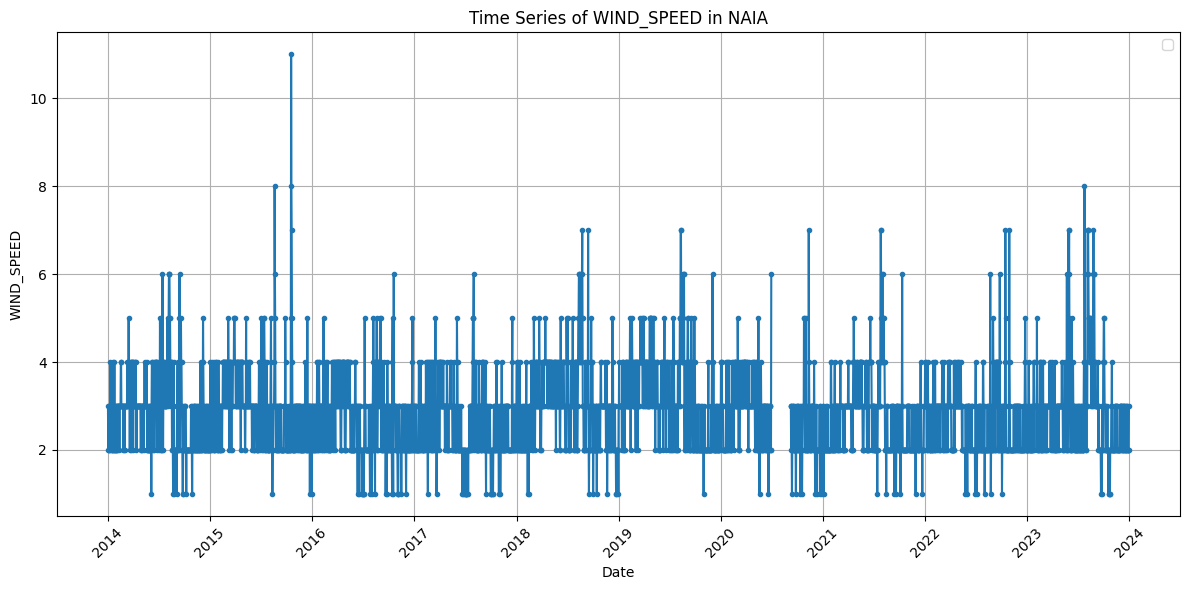

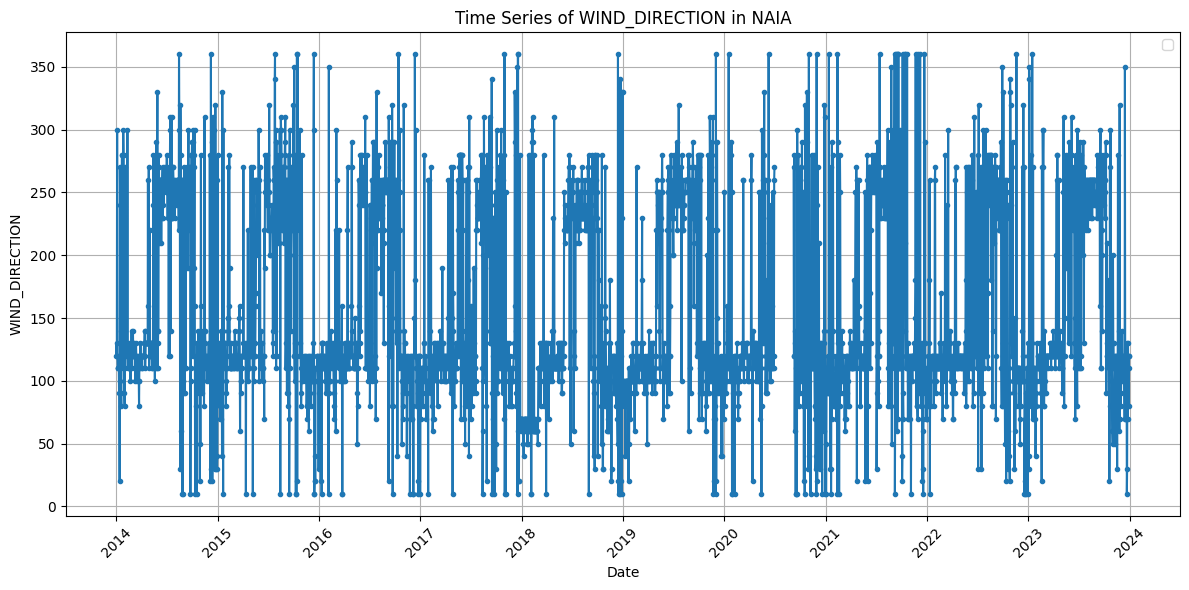

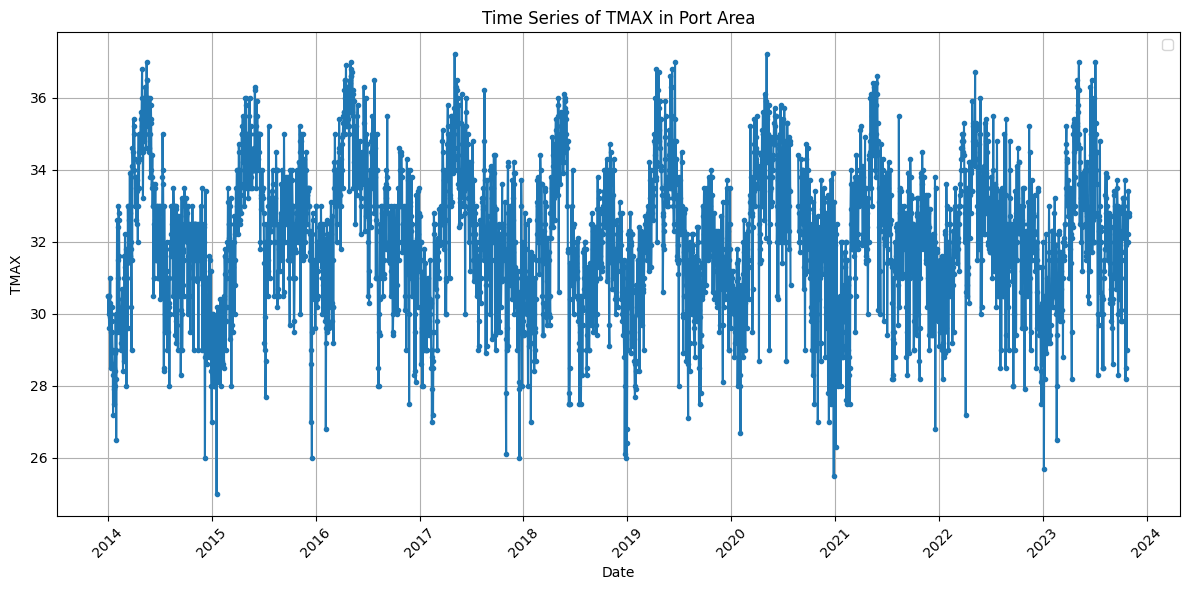

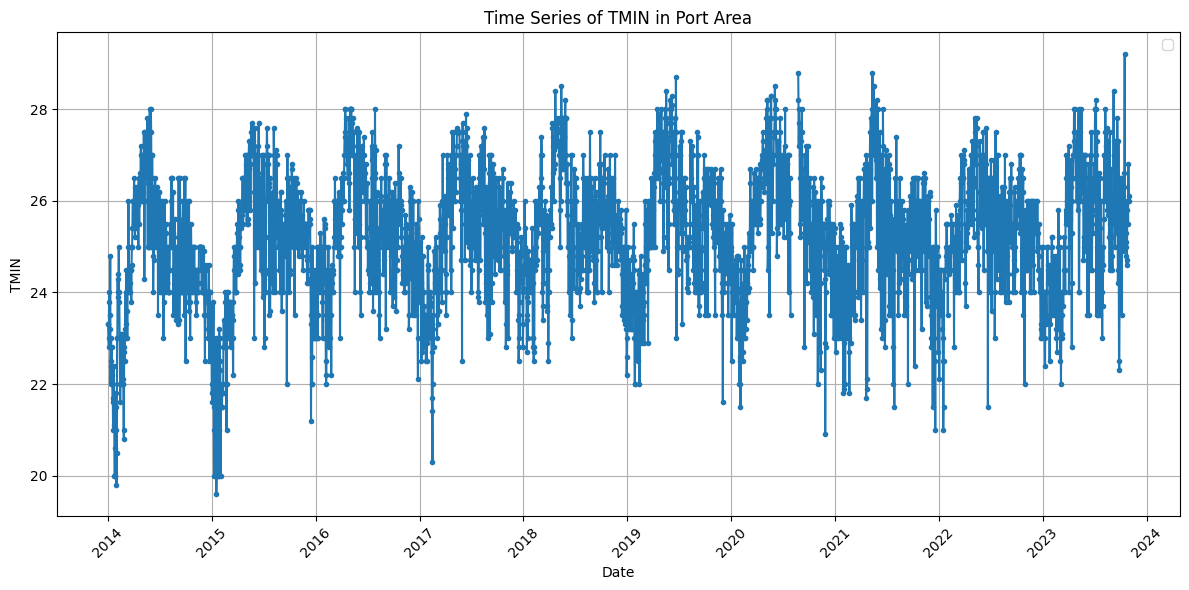

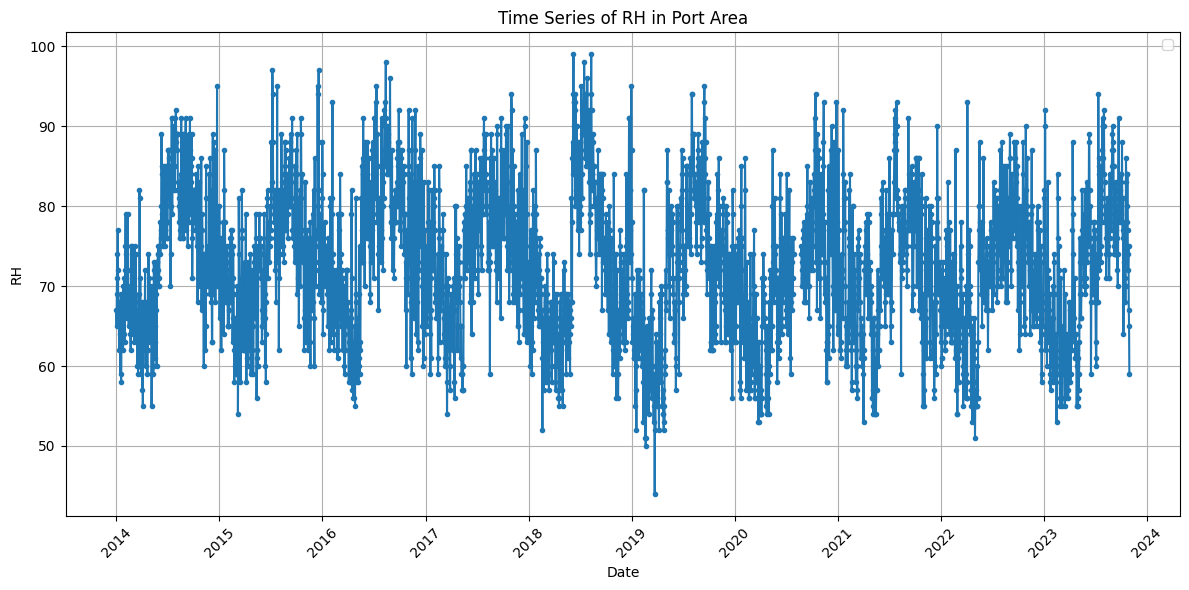

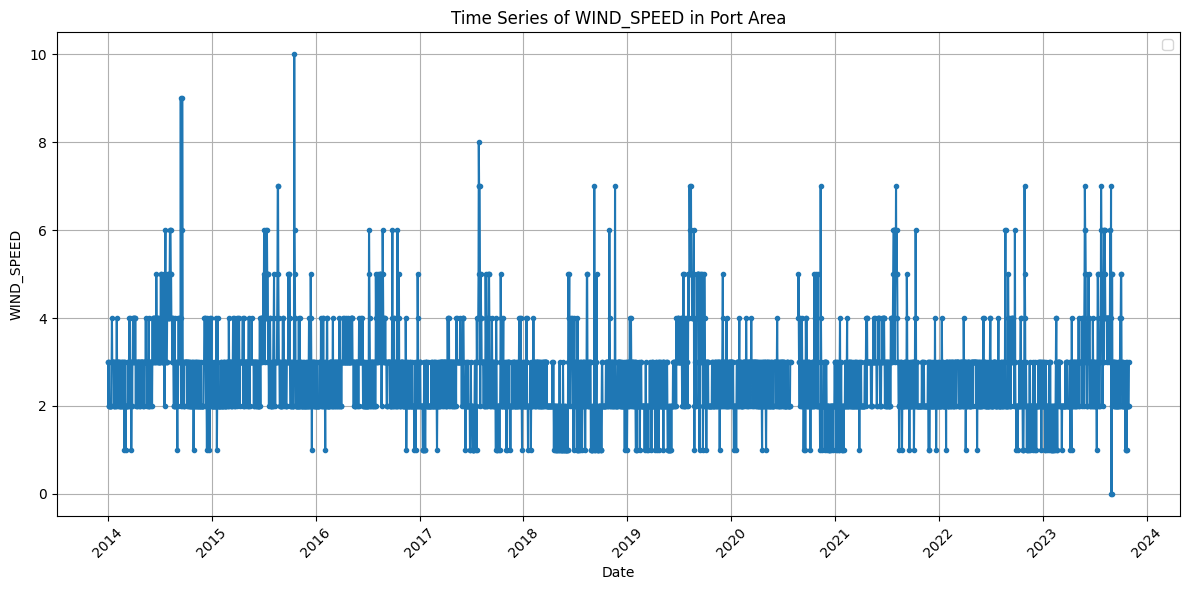

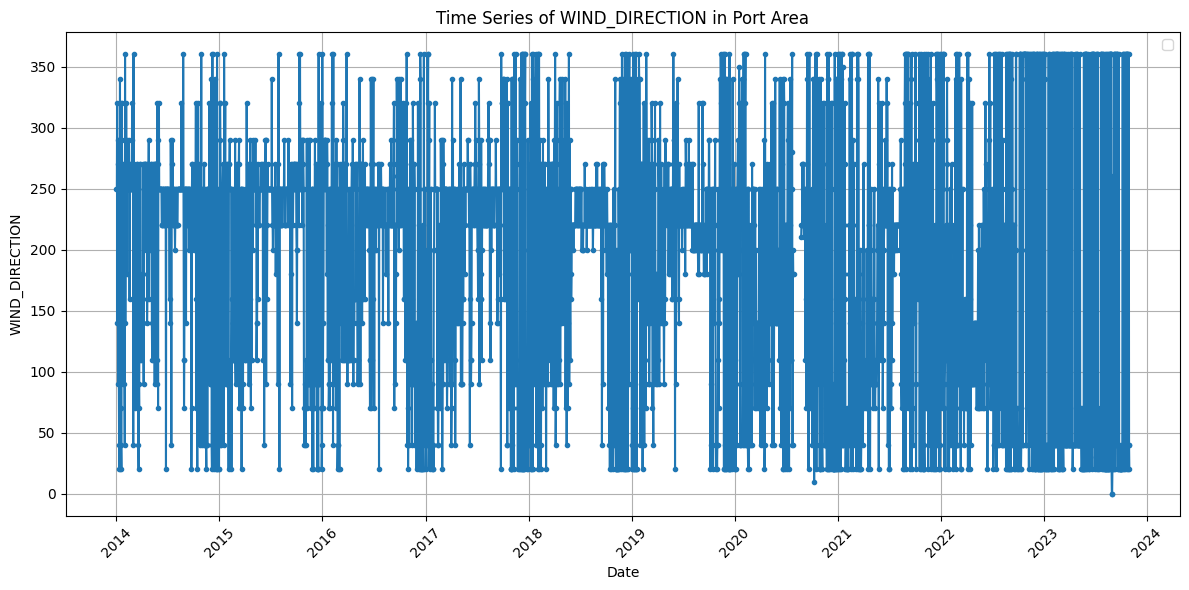

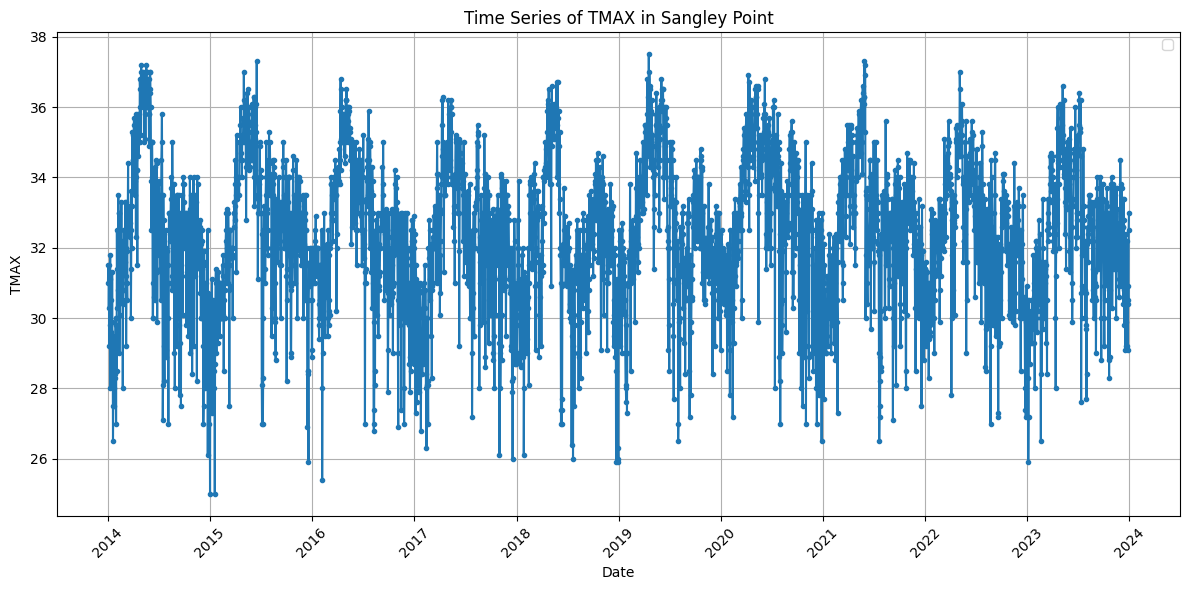

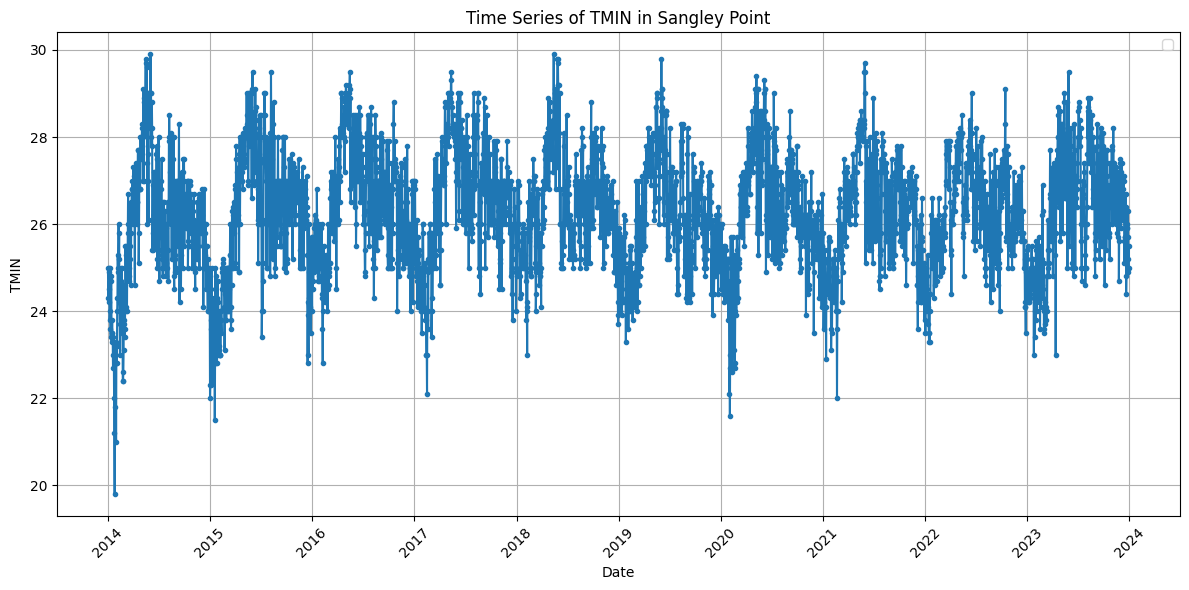

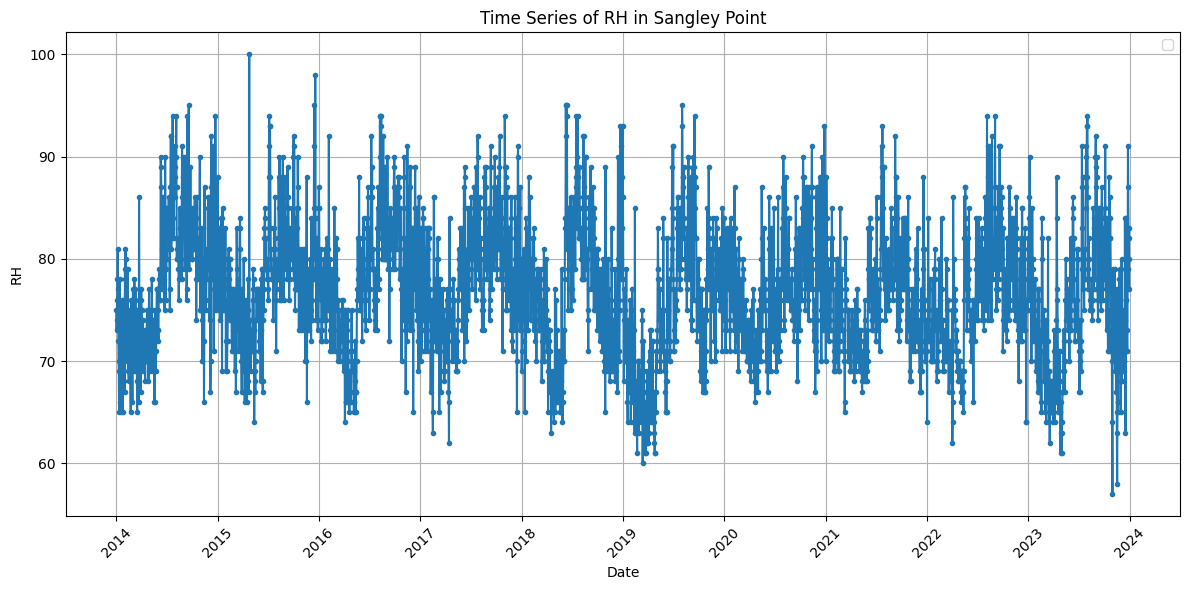

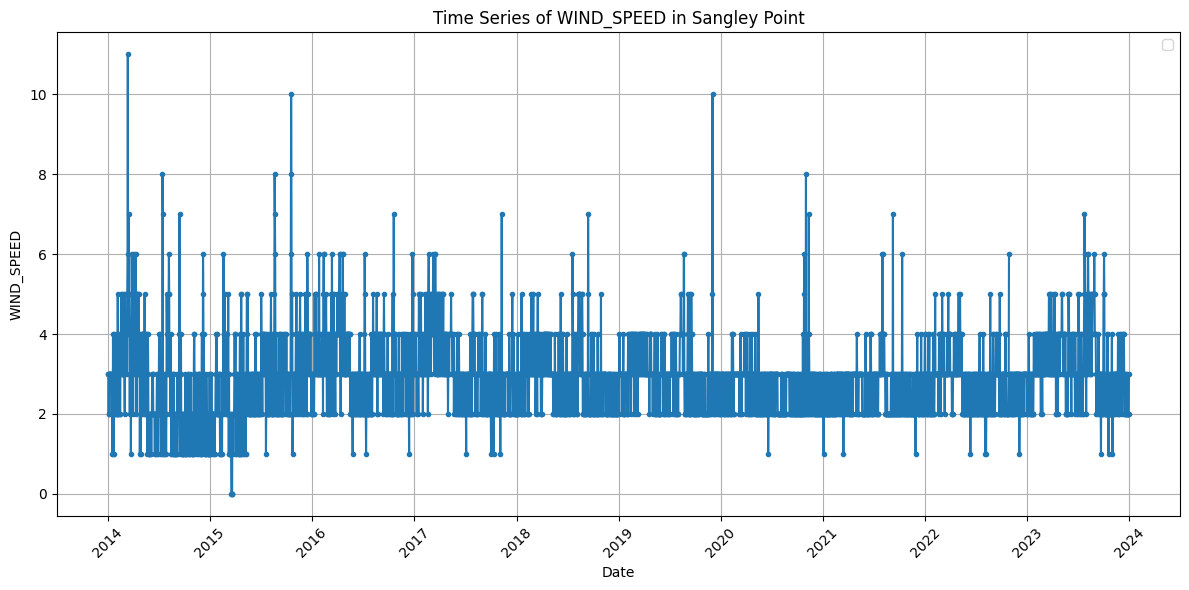

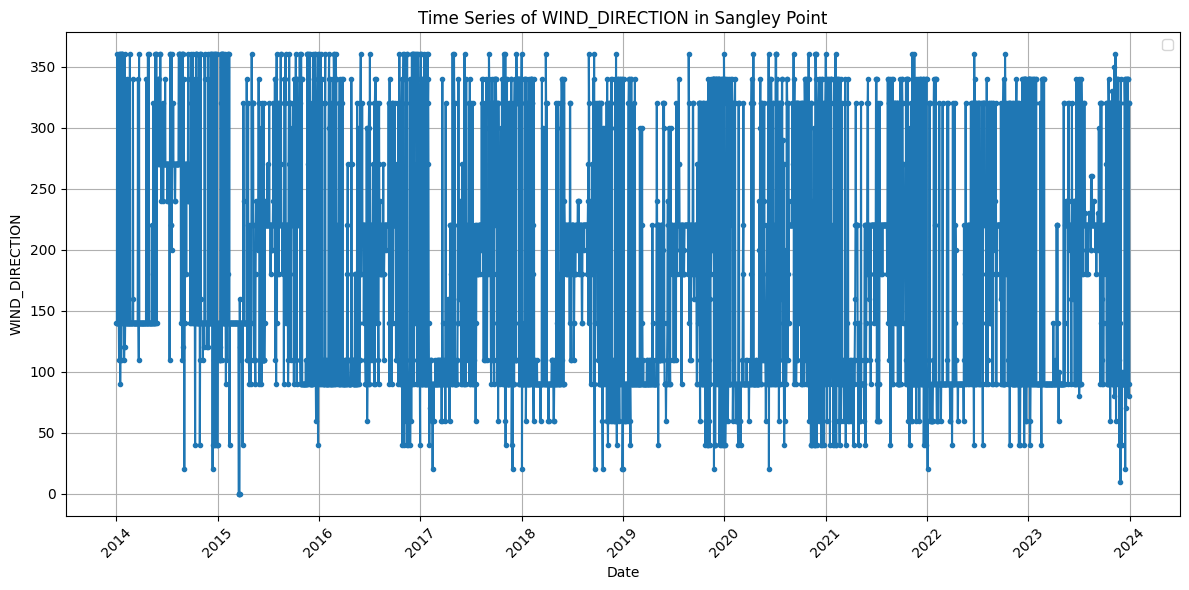

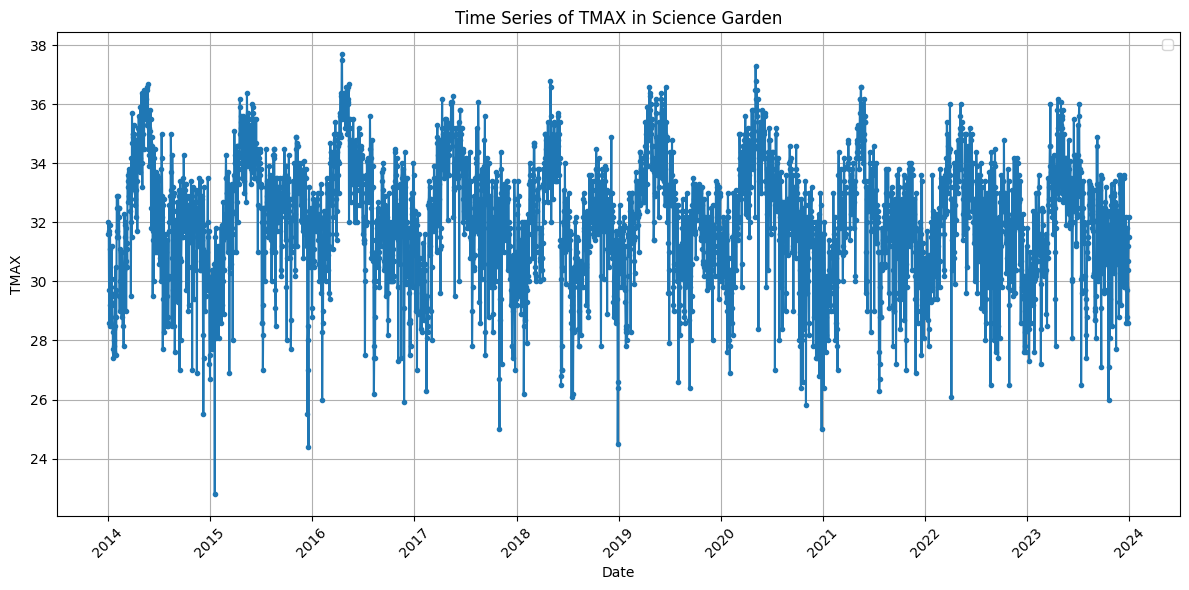

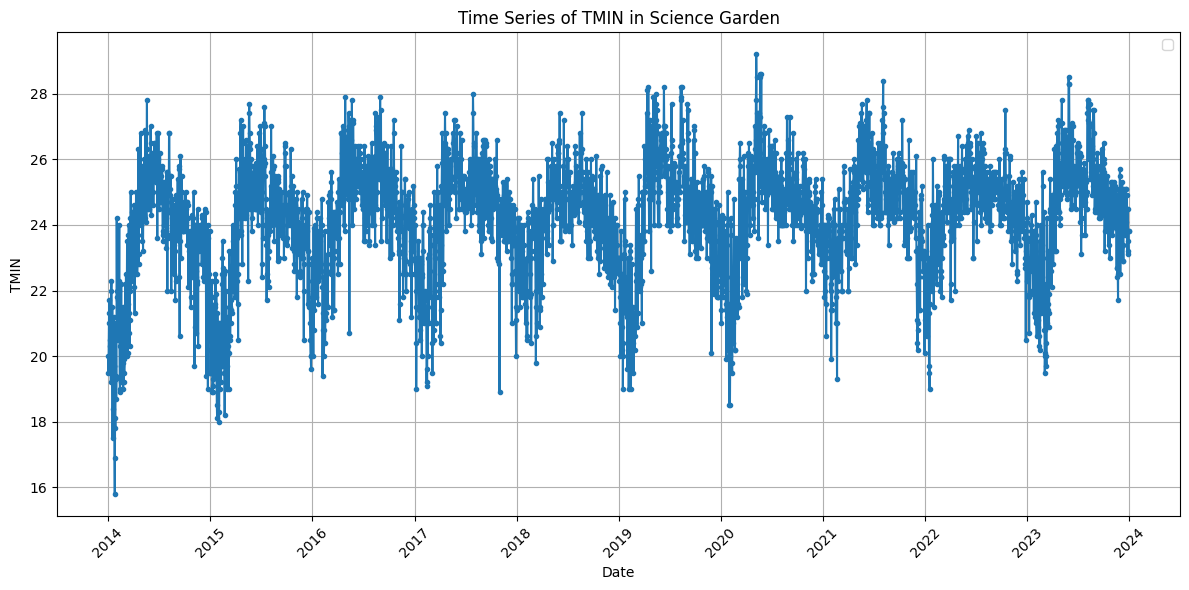

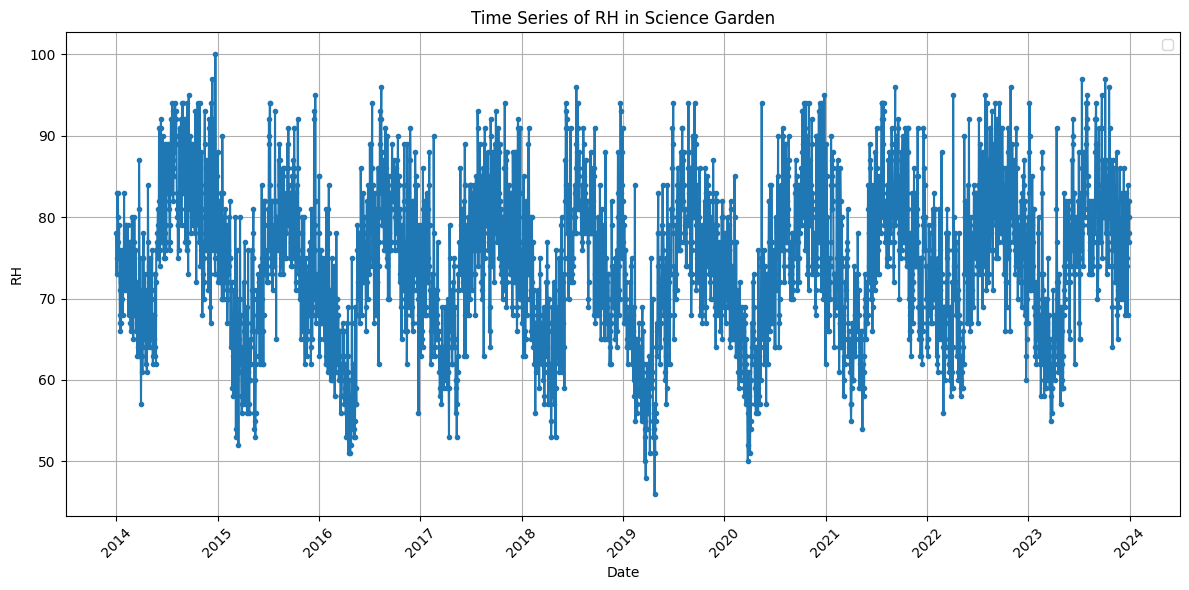

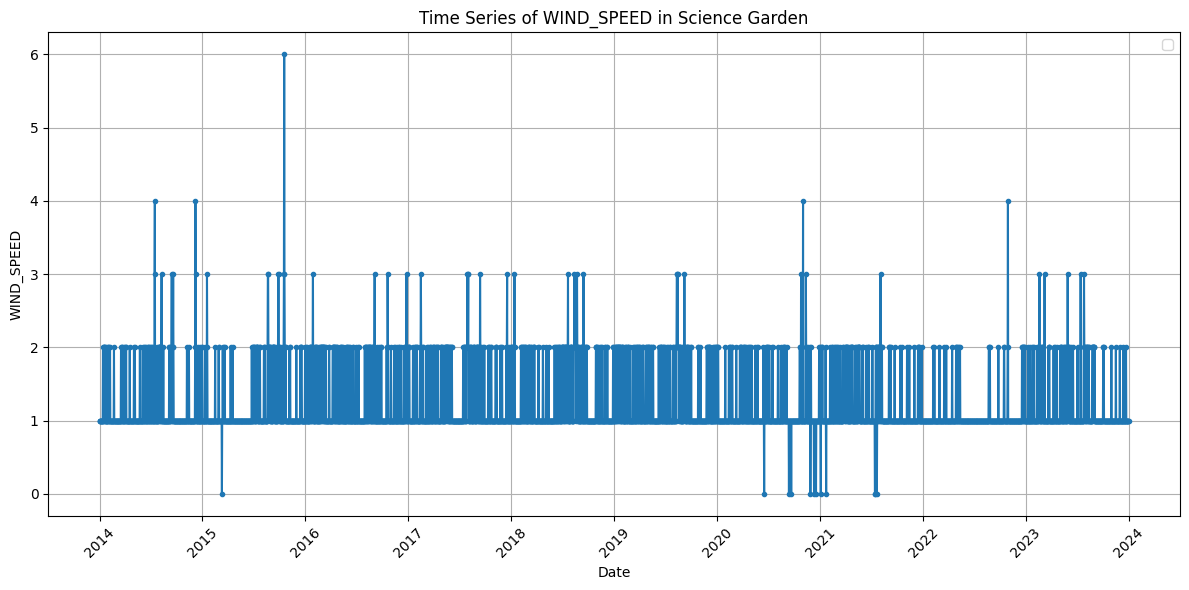

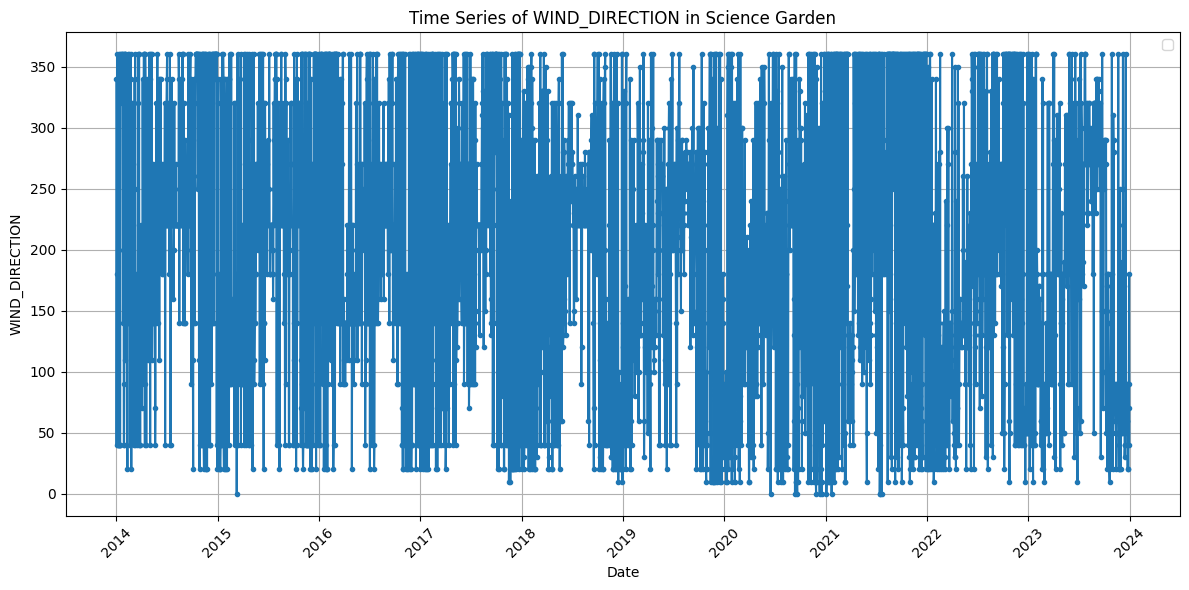

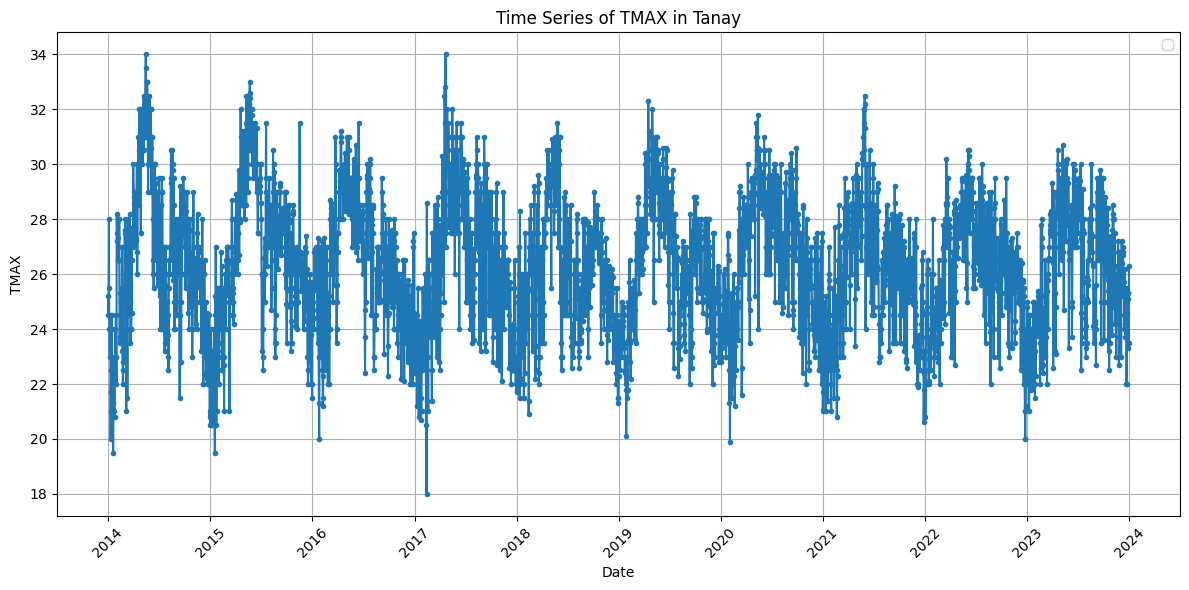

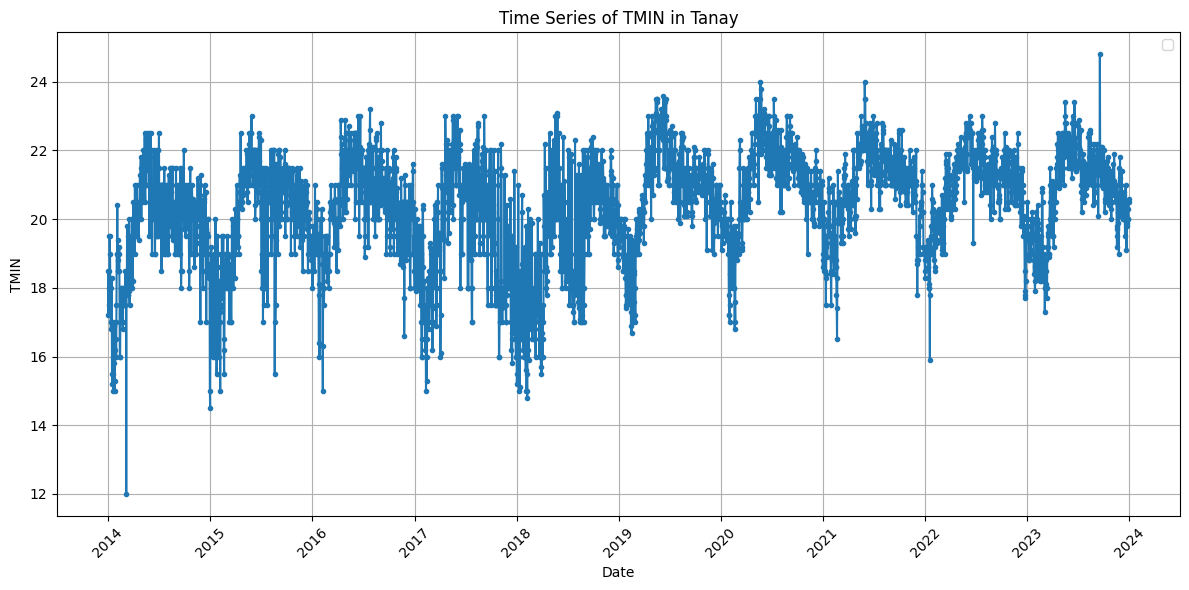

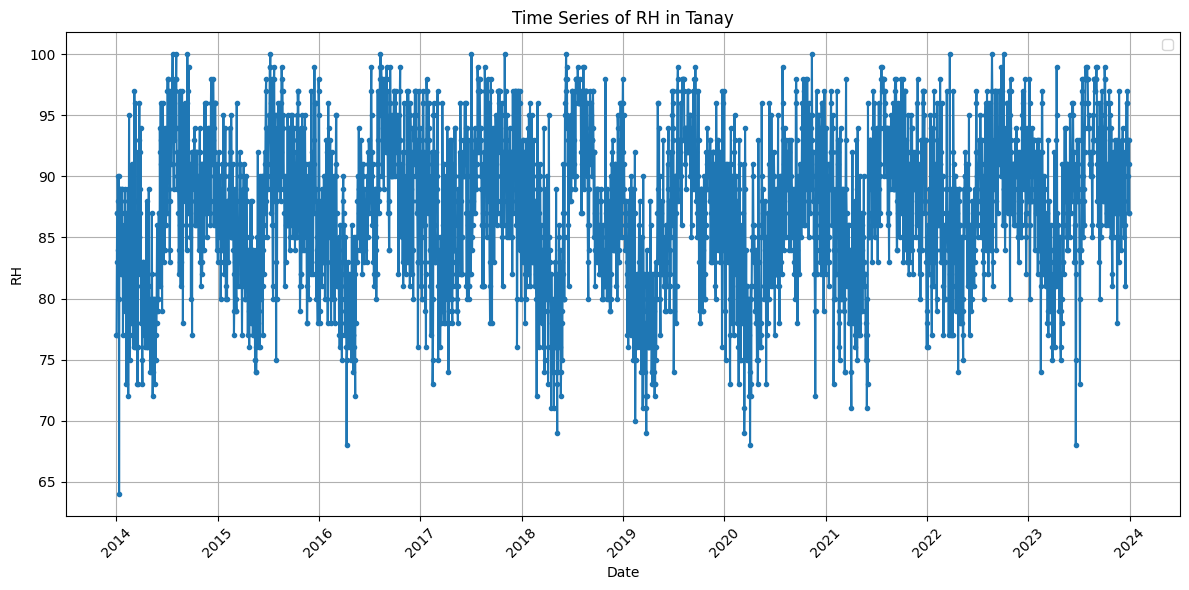

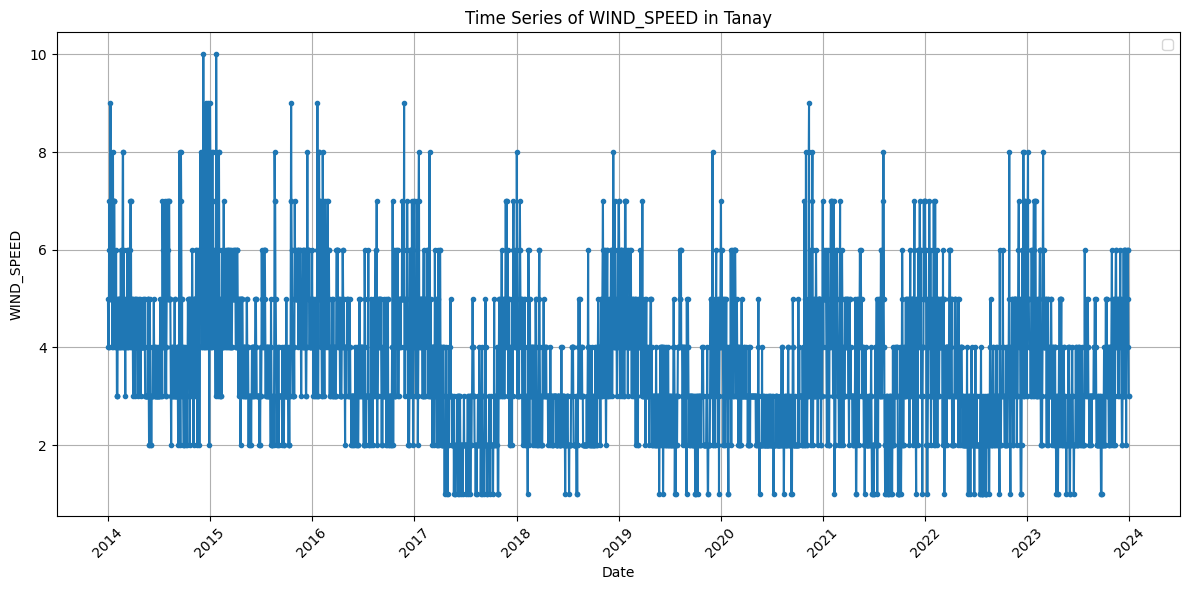

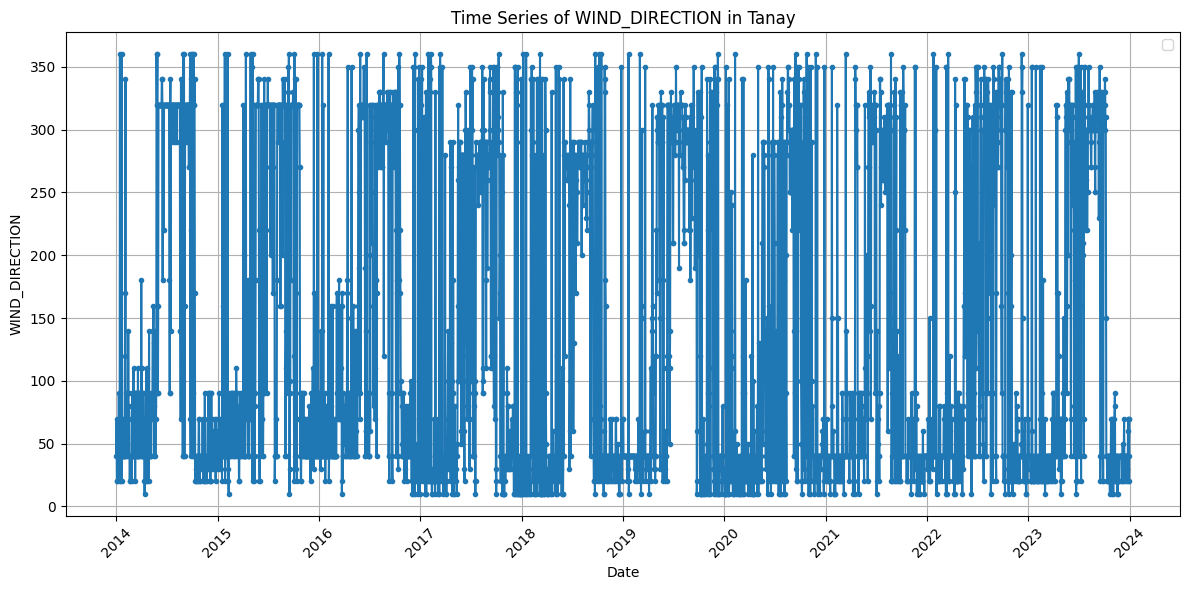

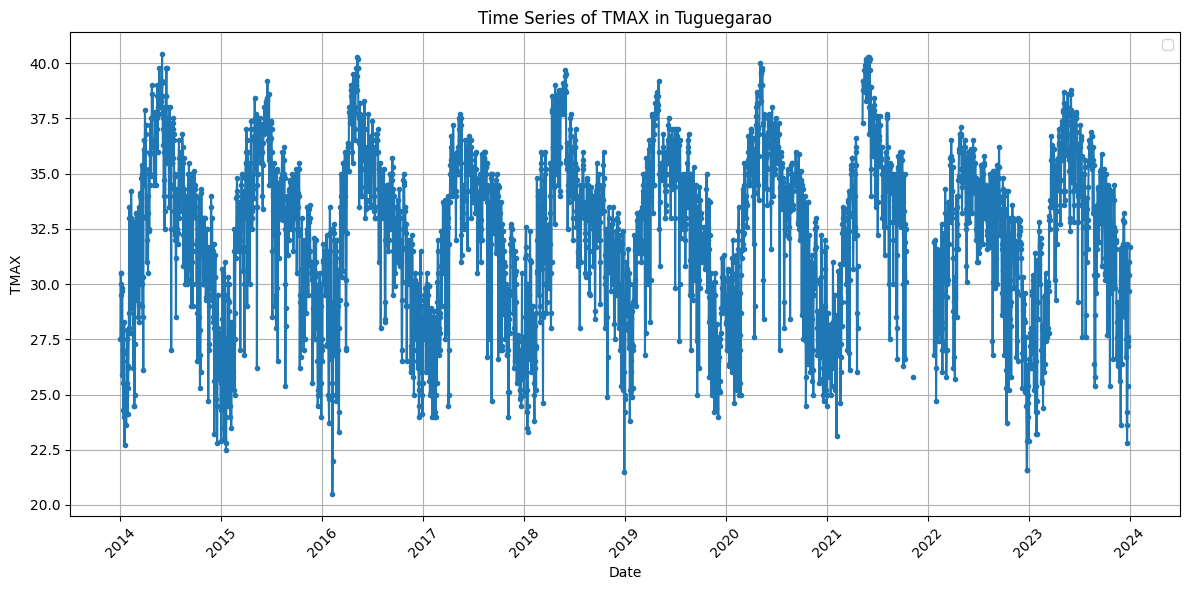

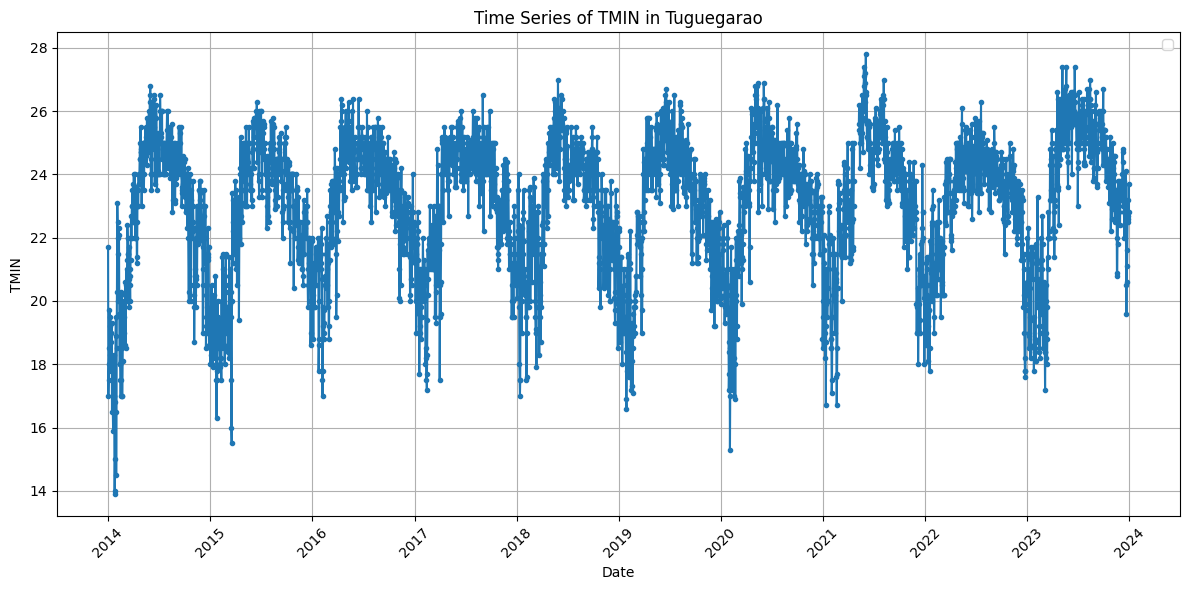

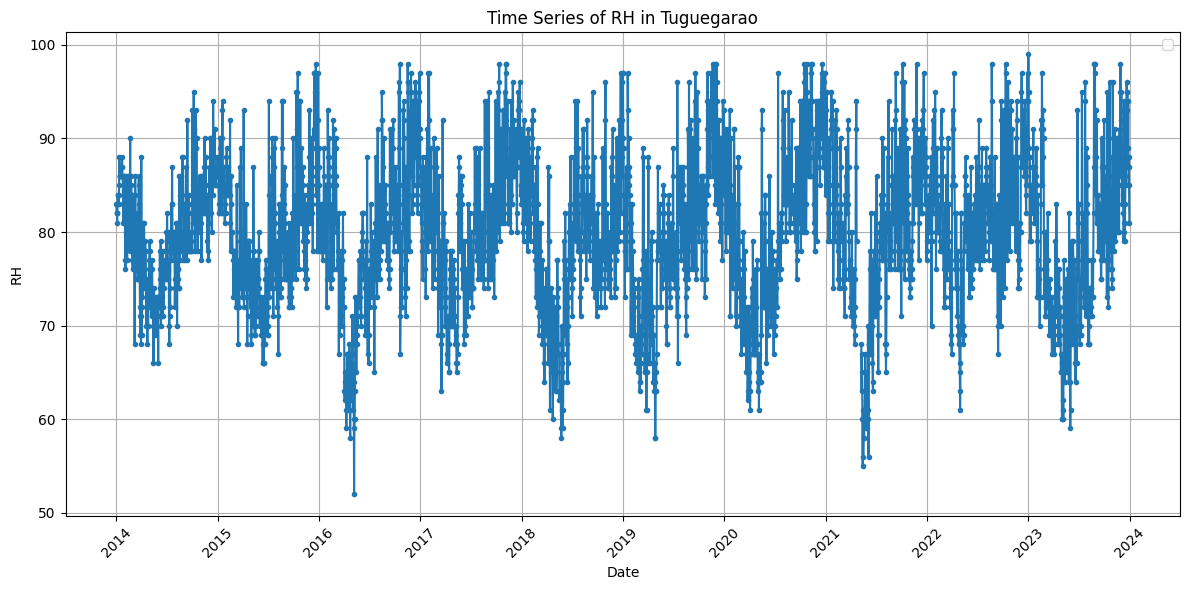

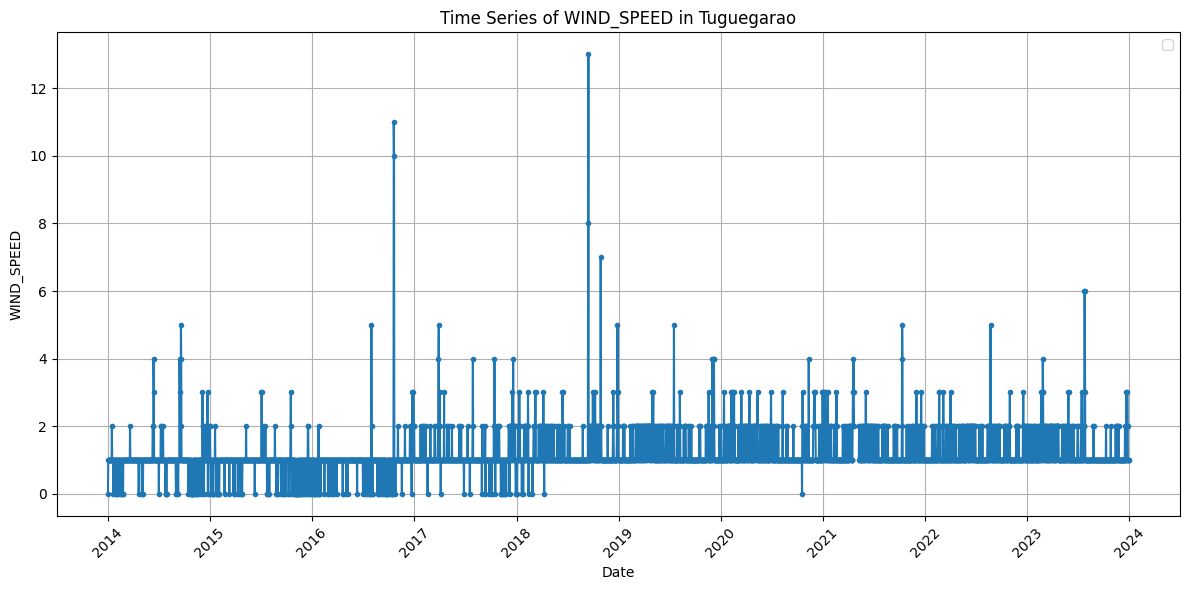

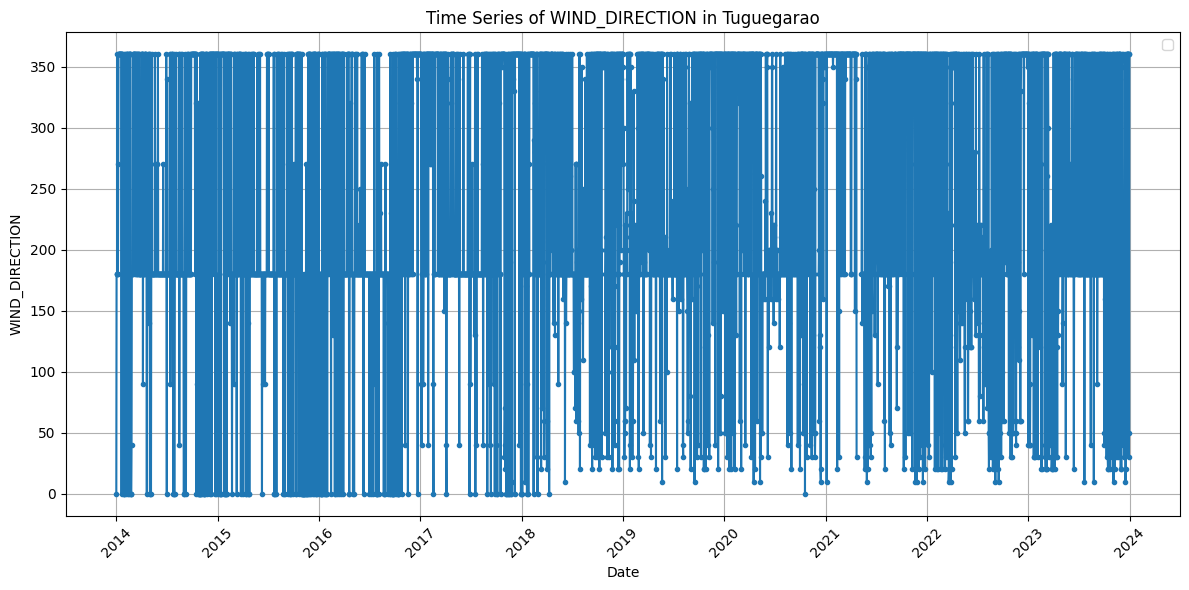

In [18]:
for df, name in zip(dataframes, dataframe_names):
    missing_cols = missing_value_columns[name]
    if missing_cols:
        plot_time_series_with_missing_values(df, missing_cols)

In [32]:
import pandas as pd
import numpy as np

def impute_station_data(df_station, alpha=0.7):
    """
    Gap-aware imputation for one station DataFrame.
    Expects columns: ['Date','TMAX','TMIN','RH','WIND_SPEED','WIND_DIRECTION'] (HI optional).
    -999.0 are treated as NaN.
    Returns DataFrame with imputed columns and recomputed 'HI'.
    """
    df = df_station.copy()
    # Ensure Datetime and sorted
    df = df.sort_values('Date').set_index('Date')
    
    # Replace sentinel with NaN
    df = df.replace(-999.0, np.nan)
    
    # --- Create circular components for WIND_DIRECTION early (so they appear in climatology) ---
    if 'WIND_DIRECTION' in df.columns:
        # WIND_DIRECTION may be NaN; np.sin(np.deg2rad(np.nan)) -> nan (ok)
        df['WIND_DIRECTION_sin'] = np.sin(np.deg2rad(df['WIND_DIRECTION']))
        df['WIND_DIRECTION_cos'] = np.cos(np.deg2rad(df['WIND_DIRECTION']))
    
    # --- Build climatologies and fallbacks ---
    # dayofyear climatology (1..366)
    climatology = df.groupby(df.index.dayofyear).mean()
    # monthly climatology fallback
    monthly_clim = df.groupby(df.index.month).mean()
    # global means as last fallback
    global_means = df.mean()
    
    # Helper: get fallback climatology value for a given Date and column
    def get_clim_value(Date, col):
        doy = Date.dayofyear
        mon = Date.month
        if col in climatology.columns:
            val = climatology.at[doy, col]
            if not pd.isna(val):
                return val
        # try monthly
        if col in monthly_clim.columns:
            mval = monthly_clim.at[mon, col]
            if not pd.isna(mval):
                return mval
        # final fallback
        return global_means.get(col, np.nan)
    
    # --- Utility: find consecutive NaN runs using boolean mask iteration ---
    def find_nan_runs(series):
        mask = series.isna().to_numpy()
        runs = []
        n = len(mask)
        i = 0
        while i < n:
            if mask[i]:
                start = i
                while i+1 < n and mask[i+1]:
                    i += 1
                end = i
                runs.append((start, end))
            i += 1
        return runs
    
    # --- Imputation function for a single scalar column ---
    def impute_scalar(s, colname):
        s = s.copy()
        if s.notna().sum() == 0:
            # nothing observed -> fill with global mean (or NaN if not available)
            fill_val = get_clim_value(s.index[0], colname)
            return s.fillna(fill_val)
        
        # Precompute an interpolated series limited to short gaps
        interp_full = s.interpolate(method='time', limit=3, limit_direction='both')
        rolling = s.rolling(window=7, min_periods=1, center=True).mean()
        
        runs = find_nan_runs(s)
        for start_pos, end_pos in runs:
            gap_len = end_pos - start_pos + 1
            idx_range = s.index[start_pos:end_pos+1]
            
            if gap_len <= 3:
                # Short gap: take interpolation result for those indices
                s.loc[idx_range] = interp_full.loc[idx_range]
            
            elif gap_len <= 14:
                # Medium gap: blended rolling + climatology
                clim_series = pd.Series([get_clim_value(d, colname) for d in s.index], index=s.index)
                blended = alpha * rolling + (1 - alpha) * clim_series
                s.loc[idx_range] = blended.loc[idx_range]
            
            else:
                # Long gap: use climatology day-of-year with fallback
                clim_vals = [get_clim_value(d, colname) for d in idx_range]
                s.loc[idx_range] = clim_vals
        
        # final safety fill (if any NaNs left) with global mean
        s = s.fillna(global_means.get(colname, np.nan))
        return s
    
    # --- Apply to scalar meteorological columns ---
    for col in ['TMAX','TMIN','RH','WIND_SPEED']:
        if col in df.columns:
            df[col] = impute_scalar(df[col], col)
    
    # --- Wind direction: impute sin/cos then convert back ---
    if 'WIND_DIRECTION' in df.columns:
        df['WIND_DIRECTION_sin'] = impute_scalar(df['WIND_DIRECTION_sin'], 'WIND_DIRECTION_sin')
        df['WIND_DIRECTION_cos'] = impute_scalar(df['WIND_DIRECTION_cos'], 'WIND_DIRECTION_cos')
        # Reconstruct direction in degrees 0..360
        WIND_DIRECTION_rad = np.arctan2(df['WIND_DIRECTION_sin'], df['WIND_DIRECTION_cos'])
        df['WIND_DIRECTION'] = (np.rad2deg(WIND_DIRECTION_rad) + 360) % 360
        df = df.drop(columns=['WIND_DIRECTION_sin','WIND_DIRECTION_cos'])
    
    return df.reset_index()


In [33]:
df_ambulong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   YEAR            3652 non-null   int64         
 1   MONTH           3652 non-null   int64         
 2   DAY             3652 non-null   int64         
 3   TMAX            3638 non-null   float64       
 4   TMIN            3638 non-null   float64       
 5   RH              3635 non-null   float64       
 6   WIND_SPEED      3638 non-null   float64       
 7   WIND_DIRECTION  3638 non-null   float64       
 8   Date            3652 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 256.9 KB


In [34]:
# Fill missing values in all datasets
for i, (df, name) in enumerate(zip(dataframes, dataframe_names)):
    df.name = name  # Ensure name attribute is set
    # Print current dataset being processed
    print(f"Imputing missing values for dataset: {df.name}")
    dataframes[i] = impute_station_data(df)
    # Check if any NaNs remain
    if dataframes[i].isna().sum().sum() == 0:
        print(f"All missing values imputed for dataset: {df.name}")
    else:
        print(f"Warning: Some missing values remain in dataset: {df.name}")

Imputing missing values for dataset: Ambulong
All missing values imputed for dataset: Ambulong
Imputing missing values for dataset: Aparri
All missing values imputed for dataset: Aparri
Imputing missing values for dataset: Baguio
All missing values imputed for dataset: Baguio
Imputing missing values for dataset: Baler
All missing values imputed for dataset: Baler
Imputing missing values for dataset: Basco
All missing values imputed for dataset: Basco
Imputing missing values for dataset: Cabanatuan
All missing values imputed for dataset: Cabanatuan
Imputing missing values for dataset: Calapan
All missing values imputed for dataset: Calapan
Imputing missing values for dataset: Clark
All missing values imputed for dataset: Clark
Imputing missing values for dataset: CLSU
All missing values imputed for dataset: CLSU
Imputing missing values for dataset: Daet
All missing values imputed for dataset: Daet
Imputing missing values for dataset: Dagupan
All missing values imputed for dataset: Dagup